# Output analysis

In [1]:
# Importing external packages

import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D
from tqdm import tqdm

In [2]:
# Importing model scripts, by first adding the main folder path

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from model.model_nile import ModelNile
from experimentation.data_generation import generate_input_data
import plotter

In [3]:
# Change the font type of matplotlib figures to make it match with the report

import matplotlib
import matplotlib.font_manager as fm

# sns.set(font_scale=1.2)

fm.fontManager.addfont("Minion Pro Regular.ttf")
matplotlib.rc("font", family="Minion Pro")

from matplotlib import rcParams

rcParams["font.family"] = "Minion Pro"
rcParams["font.sans-serif"] = "Minion Pro"
rcParams["font.size"] = 12

Read the results of the optimization:

In [4]:
opt_results = pd.read_csv("../outputs/baseline_results.csv").drop(columns="Unnamed: 0")
opt_results

v0        v1        v2        v3        v4        v5        v6  \
0    0.005230  0.087435  0.580001  0.310944 -0.799528  0.201181 -0.353628   
1    0.005551  0.114852  0.416813  0.215447 -0.673022  0.456056 -0.318718   
2    0.030241  0.398095  0.573043  0.220262 -0.598047  0.496106  0.253868   
3    0.006389  0.087435  0.580001  0.310944 -0.833288  0.201181 -0.353859   
4    0.005551  0.107585  0.416813  0.215447 -0.673022  0.456056 -0.318718   
..        ...       ...       ...       ...       ...       ...       ...   
335  0.007144  0.830940  0.072902  0.300844 -0.734843  0.473411 -0.435552   
336  0.007175  0.116353  0.069463  0.302781 -0.400135  0.843066 -0.316056   
337  0.000513  0.129930  0.420403  0.225014 -0.736449  0.426963  0.319920   
338  0.050106  0.114851  0.432650  0.216325 -0.668630  0.415235 -0.326855   
339  0.005358  0.831069  0.086272  0.304316 -0.734582  0.415057  0.257350   

           v7        v8        v9  ...      v160      v161      v162  \
0    0.206939  0.482676  0.421363  ...  0.390411  0.315424  0.513462   
1    0.234759 -0.018857  0.743872  ...  0.359905  0.096117  0.706763   
2    0.234760  0.435696  0.743870  ...  0.359905  0.047483  0.701069   
3    0.207264  0.482676  0.748096  ...  0.390411  0.315424  0.513462   
4    0.236351 -0.014472  0.743872  ...  0.359905  0.096117  0.712165   
..        ...       ...       ...  ...       ...       ...       ...   
335  0.227989  0.482517  0.725999  ...  0.387070  0.135222  0.498183   
336  0.241993  0.481670  0.507203  ...  0.081385  0.096010  0.531320   
337  0.360090  0.419278  0.743356  ...  0.020901  0.362356  0.496281   
338  0.192464  0.516901  0.743872  ...  0.354453  0.096736  0.711723   
339  0.206713  0.482517  0.744155  ...  0.110857  0.137676  0.517361   

         v163  egypt_irr  egypt_90  egypt_low_had  sudan_irr  sudan_90  \
0    0.395253   5.844010  1.567849       0.241667   0.079331  0.000000   
1    0.365144   4.668698  1.237710       0.295833   0.000000  0.000000   
2    0.738340   5.370892  1.455804       0.137500   0.000000  0.000000   
3    0.395253   5.994473  1.616057       0.208333   0.072954  0.000000   
4    0.365144   4.551618  1.267336       0.362500   0.000000  0.000000   
..        ...        ...       ...            ...        ...       ...   
335  0.403332   4.411613  1.121729       0.391667   0.061653  0.000000   
336  0.395016   4.890457  1.293816       0.258333   0.094999  0.000000   
337  0.726937  17.844476  4.218377       0.000000   0.554119  0.168737   
338  0.365124   4.495443  1.005045       0.250000   0.008598  0.000000   
339  0.747097   4.741431  1.326063       0.275000   0.072363  0.000000   

     ethiopia_hydro  
0         15.009673  
1         14.373421  
2         14.266241  
3         15.009900  
4         14.304393  
..              ...  
335       14.827489  
336       14.896243  
337       15.100161  
338       12.654251  
339       14.926539  

[340 rows x 170 columns]

Let's split the policy and objective value dataframes:

In [5]:
policies, objectives = opt_results.iloc[:, :-6], opt_results.iloc[:, -6:]

In [6]:
objectives.describe()

egypt_irr    egypt_90  egypt_low_had   sudan_irr    sudan_90  \
count  340.000000  340.000000     340.000000  340.000000  340.000000   
mean     5.799038    1.425814       0.277279    0.137928    0.012462   
std      2.807234    0.757129       0.236762    0.196730    0.034875   
min      3.499272    0.508538       0.000000    0.000000    0.000000   
25%      4.502679    1.051275       0.087500    0.001429    0.000000   
50%      5.002051    1.285461       0.216667    0.048857    0.000000   
75%      5.941854    1.527429       0.391667    0.160708    0.000000   
max     18.462717    5.171043       0.883333    0.724290    0.172364   

       ethiopia_hydro  
count      340.000000  
mean        13.941639  
std          1.303515  
min          9.424000  
25%         13.235413  
50%         14.330341  
75%         15.012950  
max         15.125298

In [7]:
(objectives.sudan_90 > 0).sum()

49

Let's kick out the Sudan 90 objective as no meaningful deficit occured:

In [8]:
# objectives = objectives.drop(columns=["sudan_90"])

Query the policies which yield best performance with respect to each objective:

In [9]:
best_obj_indices = dict()
directions = ["min", "min", "min", "min", "min", "max"]

for i, obj in enumerate(objectives):
    if directions[i] == "min":
        indexes = objectives.loc[objectives[obj] == objectives[obj].min(), :].index
    elif directions[i] == "max":
        indexes = objectives.loc[objectives[obj] == objectives[obj].max(), :].index
    else:
        print("issue with directions!")

    best_obj_indices[obj] = indexes

In [10]:
best_obj_indices

{'egypt_irr': Int64Index([271], dtype='int64'),
 'egypt_90': Int64Index([328], dtype='int64'),
 'egypt_low_had': Int64Index([ 66,  86,  98, 101, 104, 105, 118, 130, 133, 172, 183, 201, 203,
             233, 265, 280, 293, 294, 299, 301, 309, 327, 337],
            dtype='int64'),
 'sudan_irr': Int64Index([  1,   2,   4,   5,   6,   7,   8,  10,  14,  15,  19,  20,  22,
              23,  32,  33,  37,  39,  41,  42,  43,  44,  50,  53,  54,  56,
              59,  62,  65,  69,  72,  74,  77,  79,  84,  88,  89,  96,  99,
             106, 107, 110, 116, 123, 129, 132, 142, 143, 144, 145, 154, 155,
             157, 163, 165, 166, 170, 179, 184, 193, 195, 196, 206, 211, 213,
             215, 225, 226, 227, 238, 242, 243, 250, 252, 253, 257, 260, 265,
             278, 288, 292, 315, 316, 319, 329],
            dtype='int64'),
 'sudan_90': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             328, 329, 331, 332, 333, 334, 335, 336, 338, 339],
    

In [11]:
for i in best_obj_indices["sudan_irr"]:
    if i in best_obj_indices["egypt_low_had"]:
        print(i)

265


In [12]:
best_egypt_irr = policies.loc[271]
best_egypt_90 = policies.loc[328]
best_egypt_low_had = policies.loc[265]
best_ethiopia = policies.loc[86]

Before redoing the simulation with found policies, let's do some objectives visualization:

## Parallel Coordinates Plot

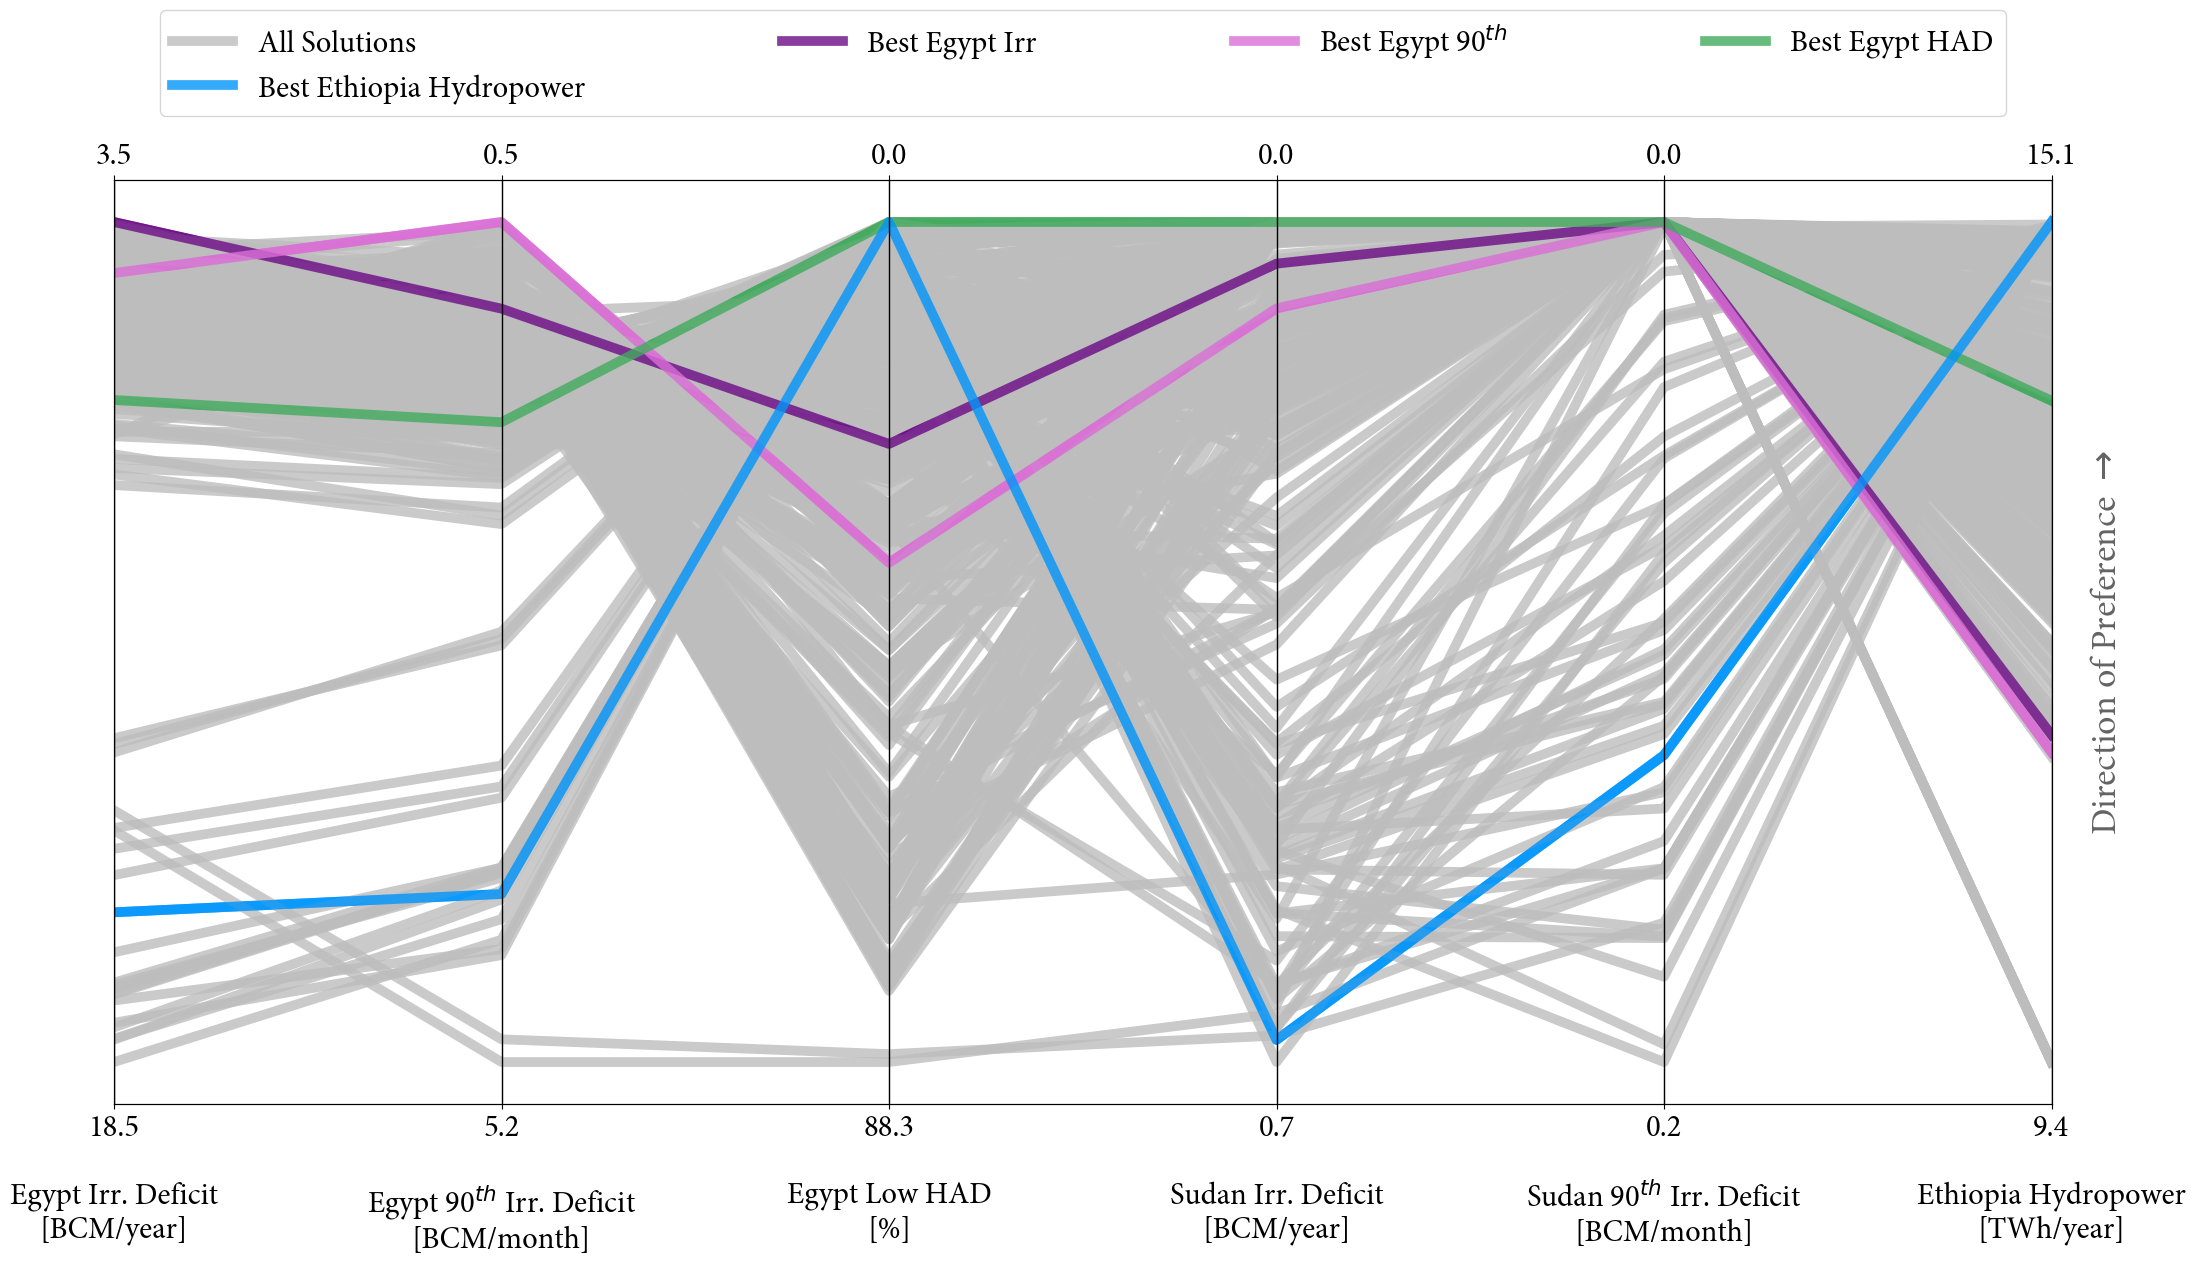

In [13]:
from plotter import parallel_plots_many_policies

parallel_plots_many_policies(
    objectives,
    solution_indices=[271, 328, 265, 86],
    solution_names=[
        "Best Egypt Irr",
        "Best Egypt 90$^{th}$",
        "Best Egypt HAD",
        "Best Ethiopia Hydropower",
    ],
)

In [14]:
def normalize_objs(df, directions):
    desirability_couples = list()
    working_df = df.copy()
    for i, col in enumerate(df.columns):
        if directions[i] == "min":
            best, worst = df[col].min(), df[col].max()
        elif directions[i] == "max":
            best, worst = df[col].max(), df[col].min()
        desirability_couples.append((worst, best))
        working_df[col] = (df[col] - worst) / (best - worst)

    return working_df, desirability_couples

Objective values are normalised such that the most desirable value becomes 1 whilst the least desirable becomes 0. On top of the normalised objectives dataframe, we can find some compromise solutions and include them into the color-coded policy set.

In [15]:
norm_df, desire_couples = normalize_objs(
    objectives, ["min", "min", "min", "min", "min", "max"]
)

In [16]:
def find_percentile_compromise_solutions(objectives_norm_df, percentile):
    # Given a threshold percentage and normalised objectives data frame,
    # returns the indices which performs above the threshold percentage
    # for all objectives
    index_lists = []
    for col in objectives_norm_df.columns:
        threshold = np.percentile(objectives_norm_df[col], percentile)
        index_lists.append(
            objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index
        )

    common_indices = []
    for i in objectives_norm_df.index:
        counter = 0
        for check_list in index_lists:
            if i not in check_list:
                break
            counter += 1
        if counter == len(index_lists):
            common_indices.append(i)

    return common_indices

In [17]:
def find_threshold_compromise_solutions(objectives_norm_df, threshold):
    # Given a threshold value [0-1] and normalised objectives data frame,
    # returns the indices which performs above the threshold value
    # for all objectives
    index_lists = []
    for col in objectives_norm_df.columns:
        index_lists.append(
            objectives_norm_df.loc[objectives_norm_df[col] >= threshold, :].index
        )

    common_indices = []
    for i in objectives_norm_df.index:
        counter = 0
        for check_list in index_lists:
            if i not in check_list:
                break
            counter += 1
        if counter == len(index_lists):
            common_indices.append(i)

    return common_indices

In [20]:
find_percentile_compromise_solutions(norm_df, 45)

[165]

In [26]:
find_threshold_compromise_solutions(norm_df, 0.82)

[248]

Now, we can add two more solutions into the policy set for further analysis:

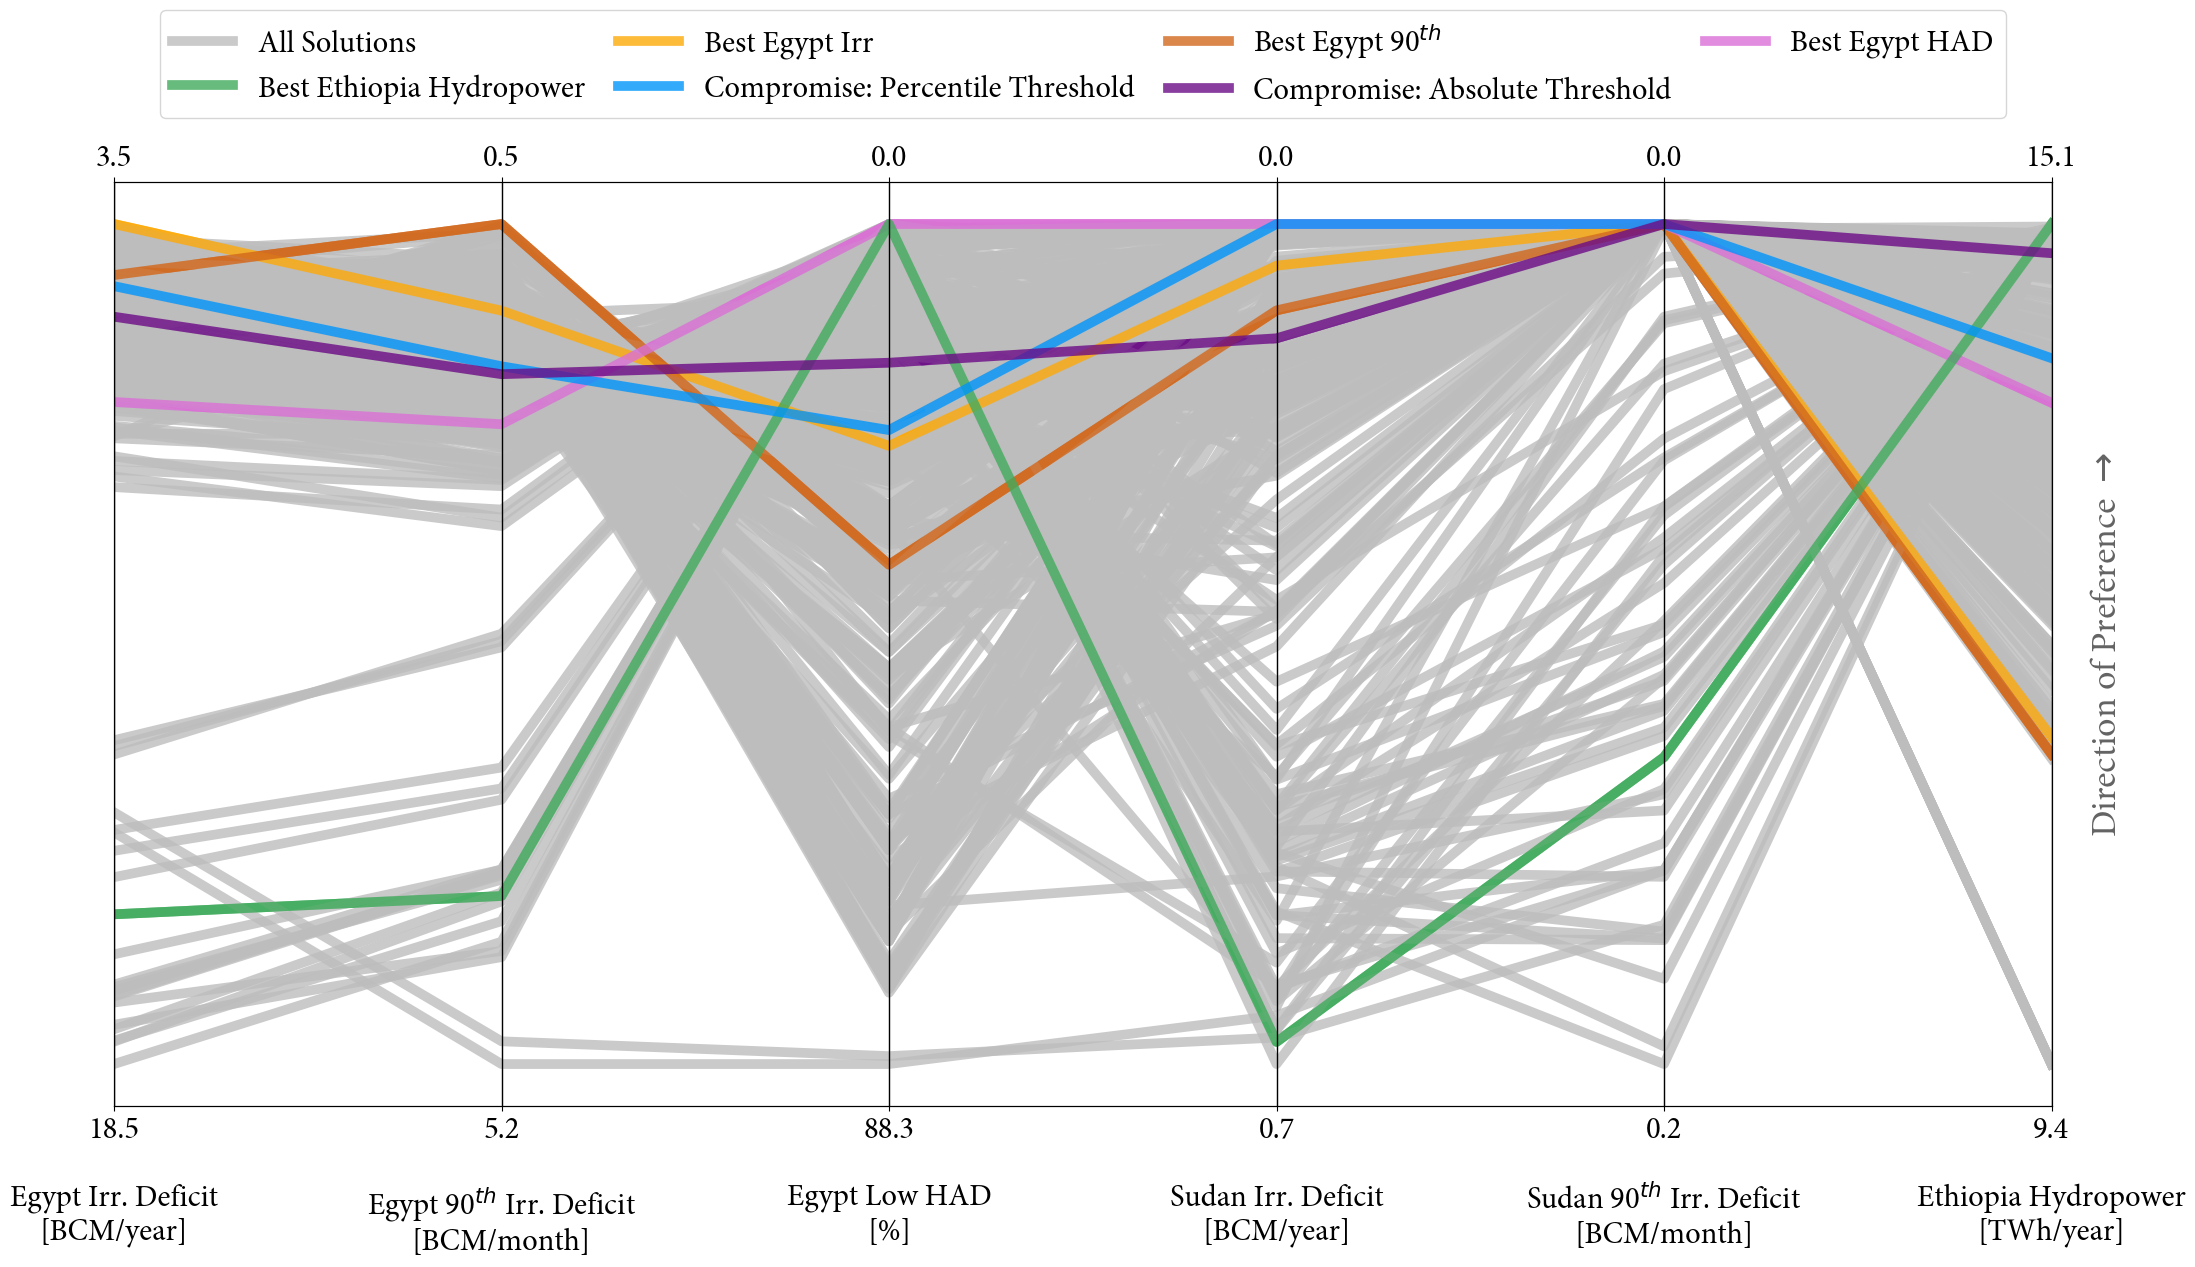

In [34]:
import importlib
importlib.reload(plotter)

solution_indices = [271, 328, 265, 86, 165, 248]
solution_names = [
    "Best Egypt Irr",
    "Best Egypt 90$^{th}$",
    "Best Egypt HAD",
    "Best Ethiopia Hydropower",
    "Compromise: Percentile Threshold",
    "Compromise: Absolute Threshold",
]

plotter.parallel_plots_many_policies(
    objectives,
    solution_indices=solution_indices,
    solution_names=solution_names,
    saved=True,
)

For the following stage of open exploration/scenario discovery, we save the six exemplary policies from above analysis:

In [21]:
policies_for_exploration = policies.loc[[271, 328, 265, 86, 165, 248], :]
policies_for_exploration["name"] = [
    "best_egypt_aggregate",
    "best_egypt_90",
    "best_egypt_HAD",
    "best_ethiopia",
    "compromise_percentile",
    "compromise_threshold",
]
policies_for_exploration

v0        v1        v2        v3        v4        v5        v6  \
168  0.027675  0.431101  0.386805  0.307429 -0.472013  0.489319  0.271693   
0    0.905692  0.170598  0.438845  0.307555 -0.777859  0.386203  0.277646   
31   0.042187  0.445677  0.438277  0.304983 -0.783147  0.491964  0.263191   
15   0.014670  0.422703  0.386431  0.309080 -0.237964  0.309759  0.265029   
84   0.039504  0.479213  0.437965  0.307204 -0.794300  0.510652  0.243035   
45   0.042220  0.469741  0.426929  0.305591 -0.778528  0.734479  0.263455   

           v7        v8        v9  ...      v155      v156      v157  \
168  0.108168 -0.774115  0.971085  ...  0.399002  0.559068  0.216790   
0    0.108075 -0.922820  0.405889  ...  0.415597  0.566493  0.314284   
31   0.103177 -0.749246  0.406421  ...  0.414964  0.562632  0.211209   
15   0.108896 -0.971549  0.403978  ...  0.406833  0.563267  0.237695   
84   0.045077 -0.747050  0.402449  ...  0.406913  0.569532  0.218934   
45   0.113560 -0.793778  0.411874  ...  0.406493  0.560469  0.238765   

         v158      v159      v160      v161      v162      v163  \
168 -0.719823  0.868430  0.950715  0.046718  0.691930  0.988440   
0   -0.719244  0.871550  0.081926  0.044716  0.661717  0.997476   
31  -0.718837  0.871991  0.953052  0.055762  0.690708  0.992917   
15  -0.719076  0.871977  0.101661  0.045688  0.698620  0.984728   
84  -0.729808  0.899555  0.085155  0.054110  0.697230  0.980149   
45  -0.718833  0.873723  0.933073  0.055896  0.709431  0.997992   

                      name  
168   best_egypt_aggregate  
0            best_egypt_90  
31          best_egypt_HAD  
15           best_ethiopia  
84   compromise_percentile  
45    compromise_threshold  

[6 rows x 165 columns]

In [22]:
policies_for_exploration.to_csv("../outputs/policies_exploration.csv", index=False)

## Pair plot of Objective Values

Now, let's show the pairplot of all objectives across the set of solutions found by the optimisation:

In [28]:
names_display = [
    "Egypt Irr. Deficit",
    "Egypt 90$^{th}$ Irr. Deficit",
    "Egypt Low HAD",
    "Sudan Irr. Deficit",
    "Sudan 90$^{th}$ Irr. Deficit",
    "Ethiopia Hydropower",
]
norm_df_names = norm_df.copy()
norm_df_names.columns = names_display
sns.pairplot(
    norm_df_names,
    corner=True,
    diag_kind="kde",
    kind="reg",
    plot_kws={"line_kws": {"color": "red"}},
)

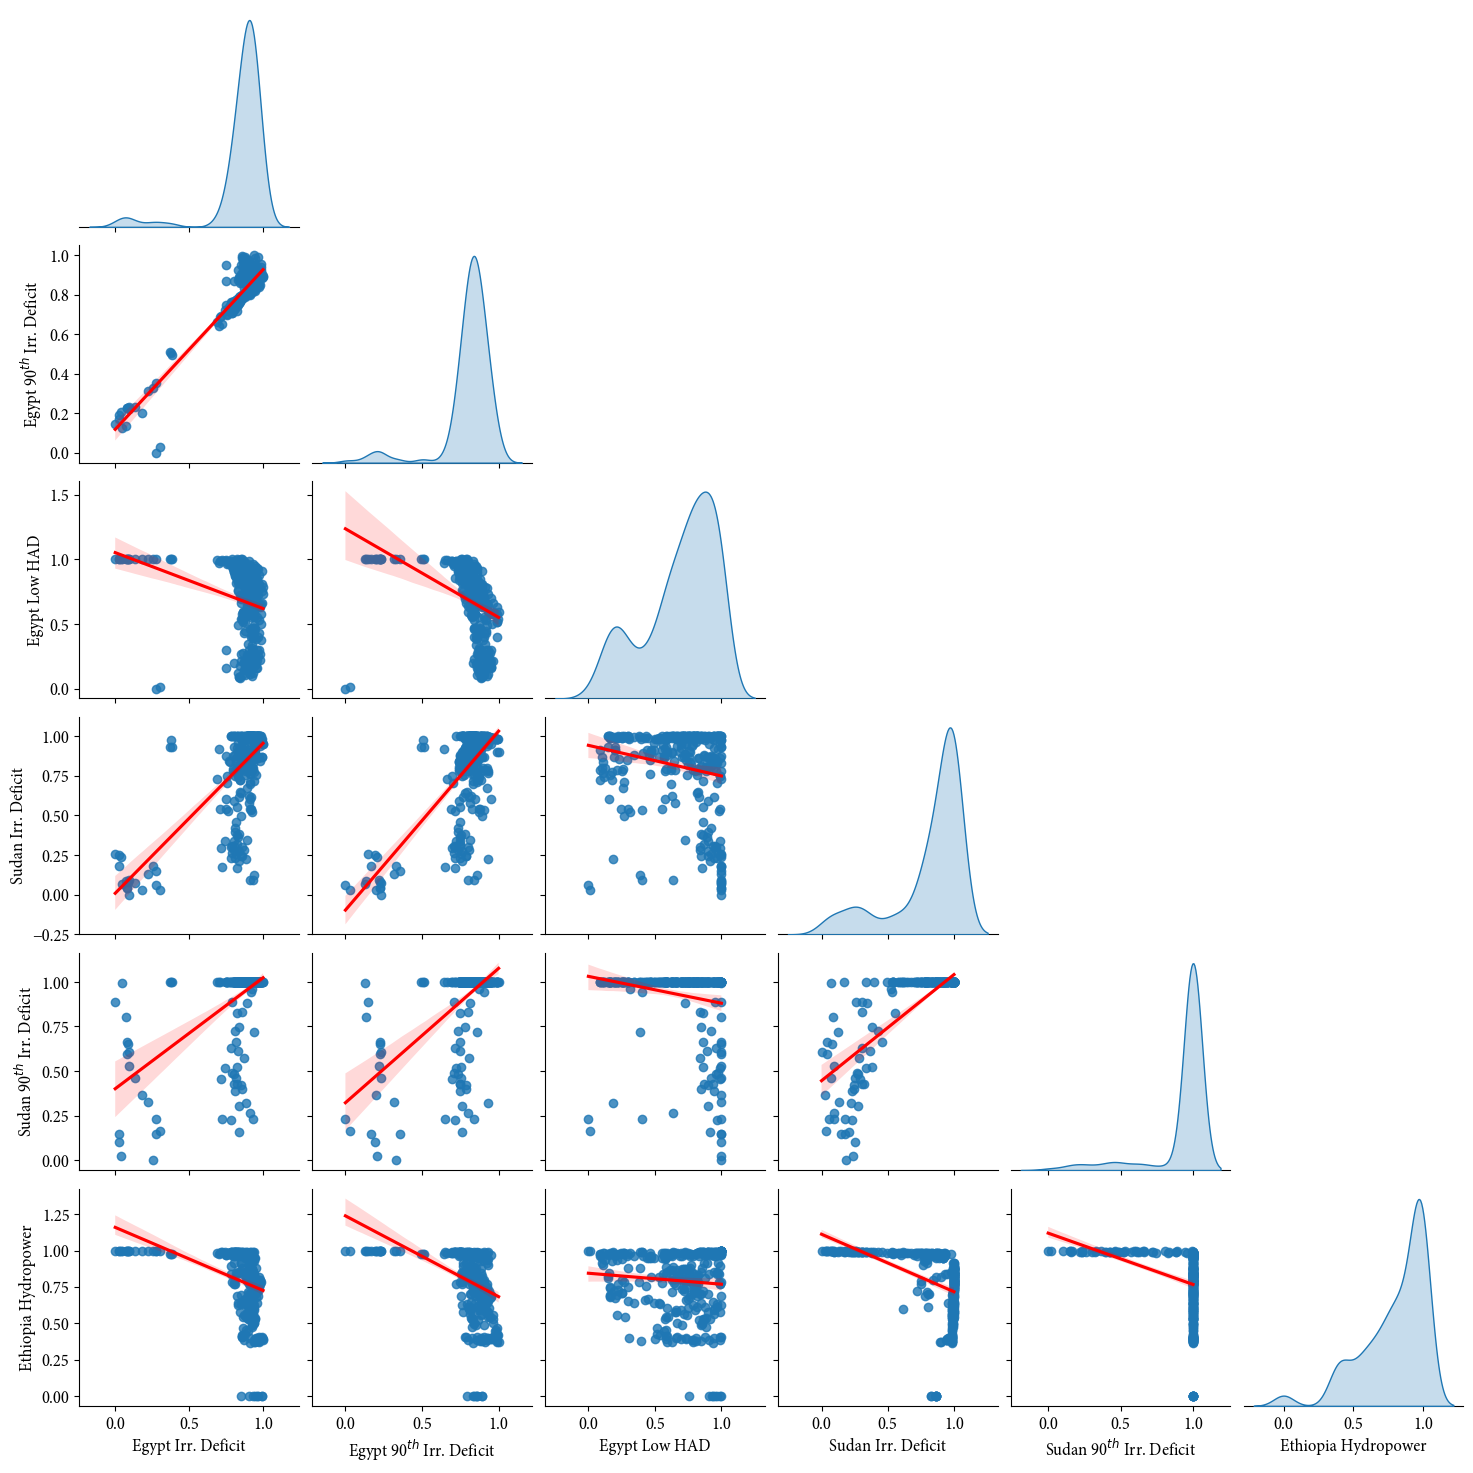

In [29]:
plt.show()

## System Behaviour under Selected Policies

Let's first create and run a separate model under every one of the policies and store them in a dict. Then, bring the plotter class for visuals.

In [30]:
solution_indices = [271, 328, 265, 86, 165, 248]
solutions = [policies.loc[i] for i in solution_indices]
solution_names = [
    "Best Egypt Irr",
    "Best Egypt 90$^{th}$",
    "Best Egypt HAD",
    "Best Ethiopia Hydropower",
    "Compromise: Percentile Threshold",
    "Compromise: Absolute Threshold",
]
running_models = dict()
for i, sol_name in tqdm(enumerate(solution_names)):
    new_model = ModelNile()
    new_model = generate_input_data(new_model)
    new_model.evaluate(solutions[i])
    running_models[sol_name] = new_model

6it [02:55, 29.33s/it]


----------------
Best Egypt Irr
----------------


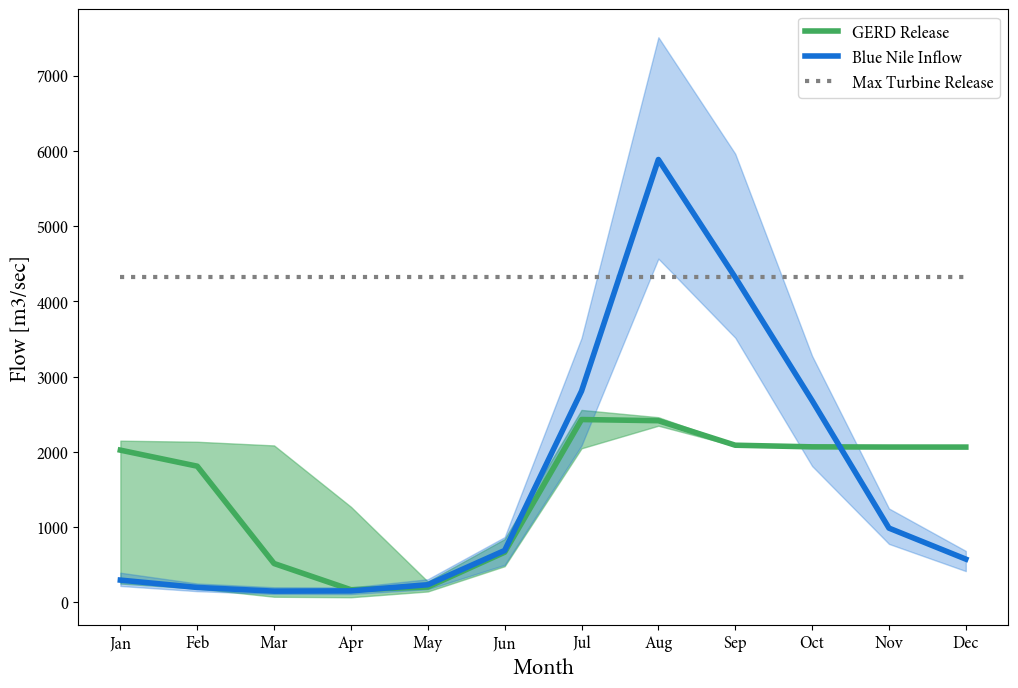

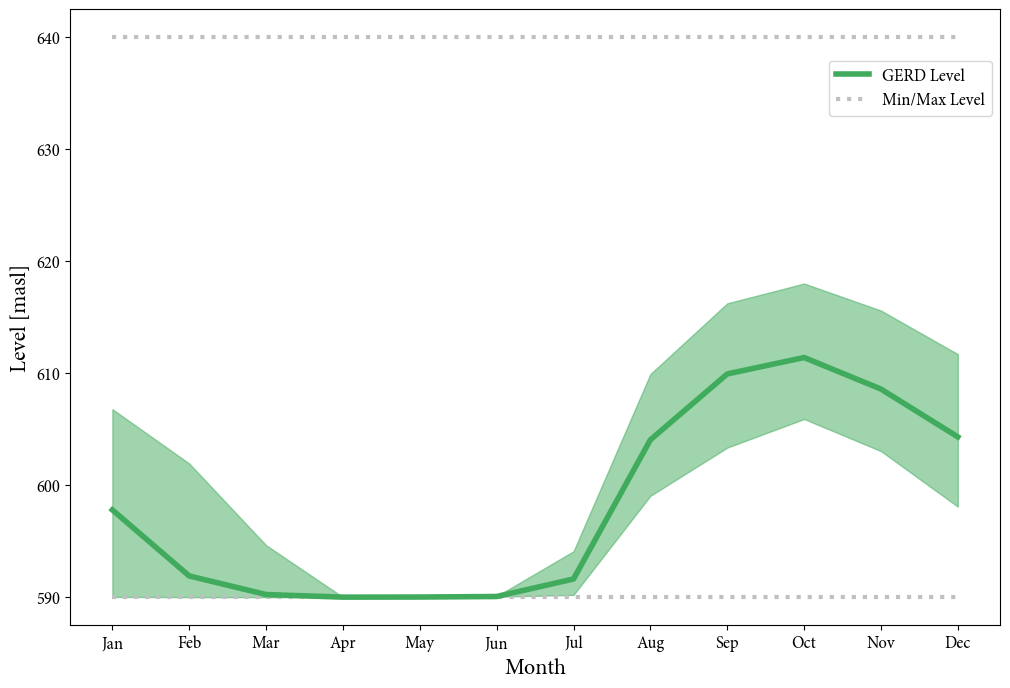

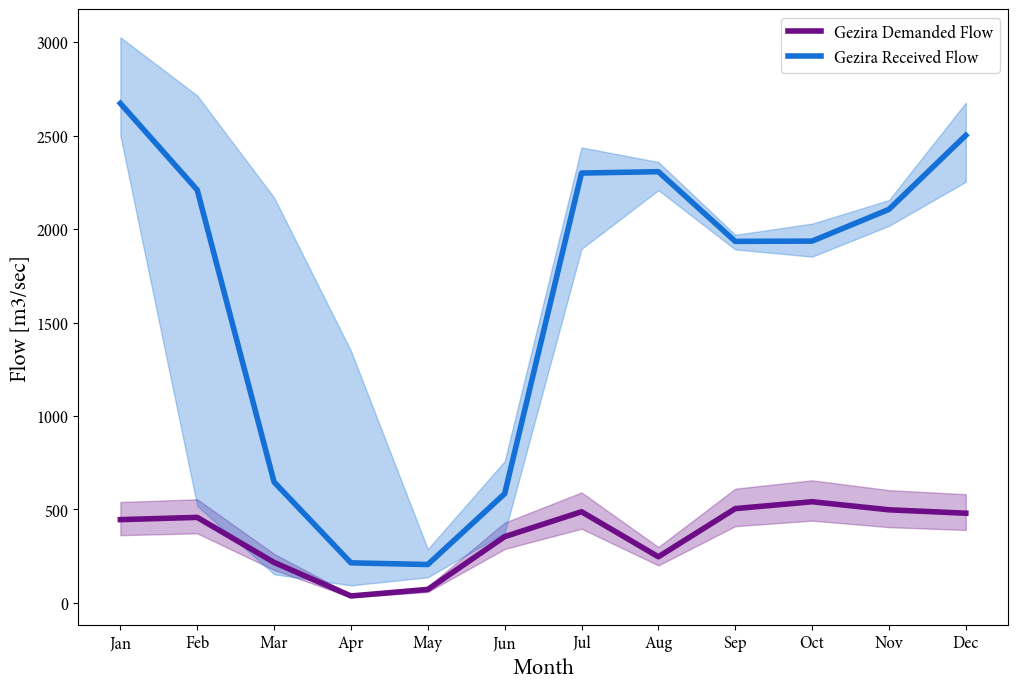

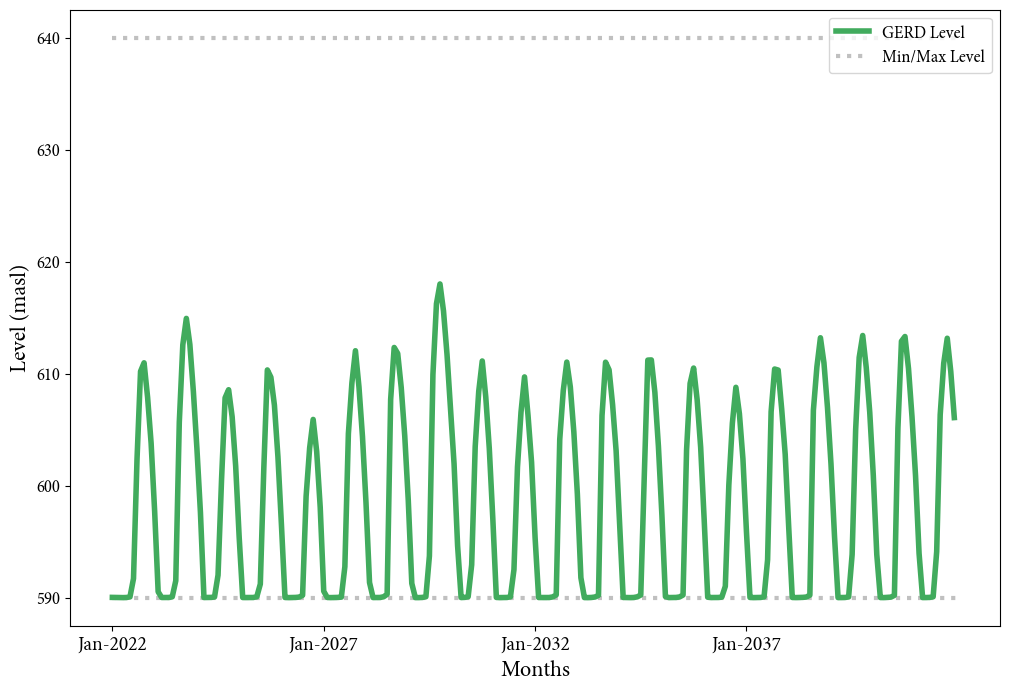

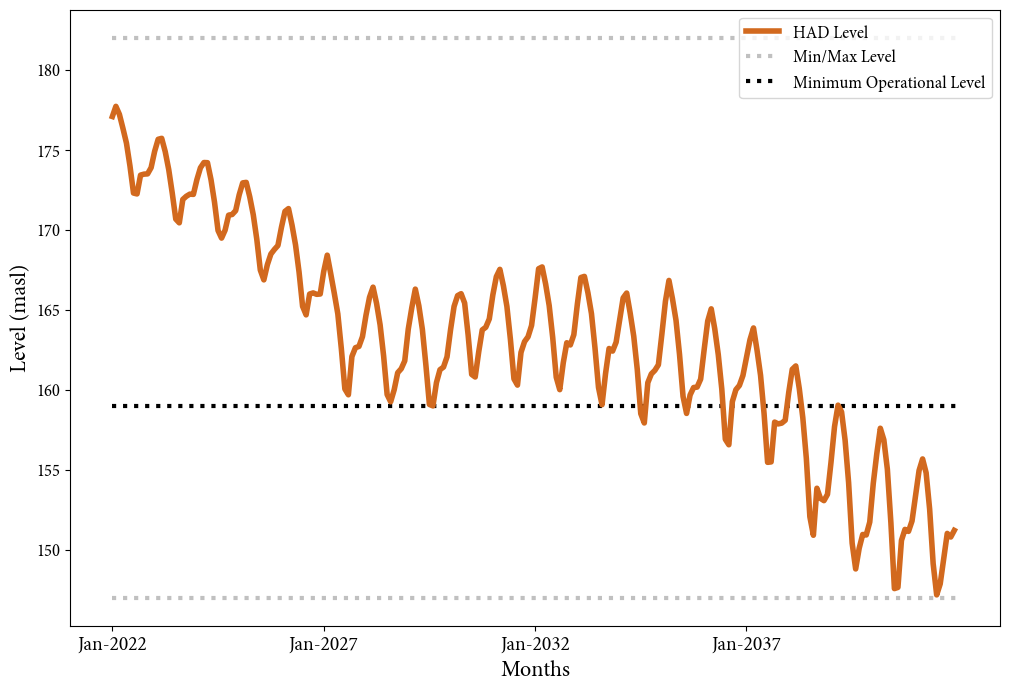

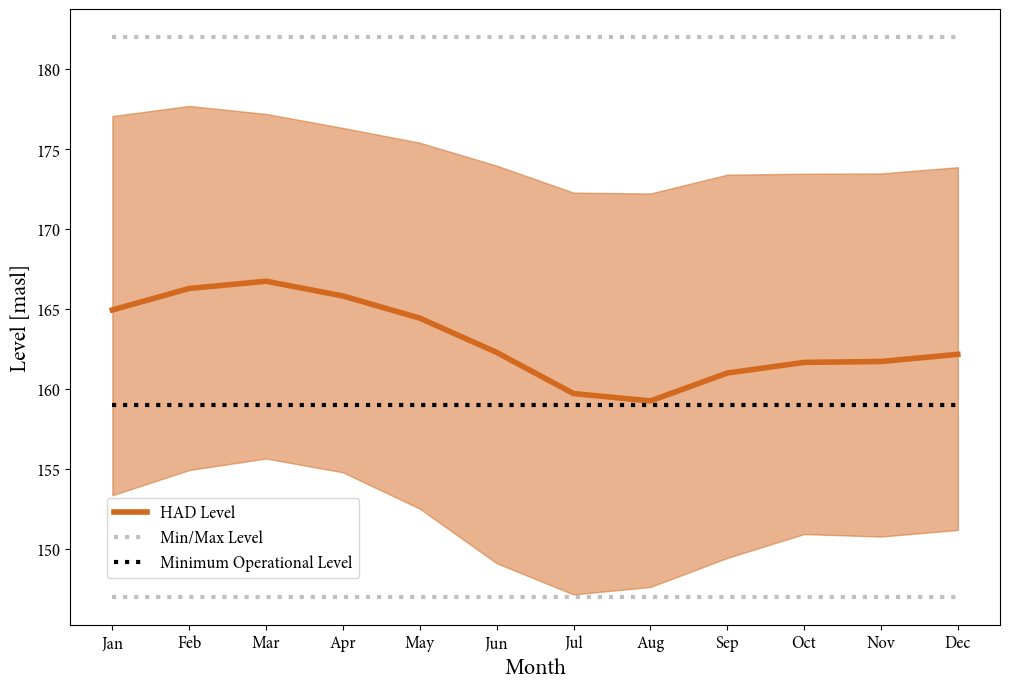

----------------
Best Egypt 90$^{th}$
----------------


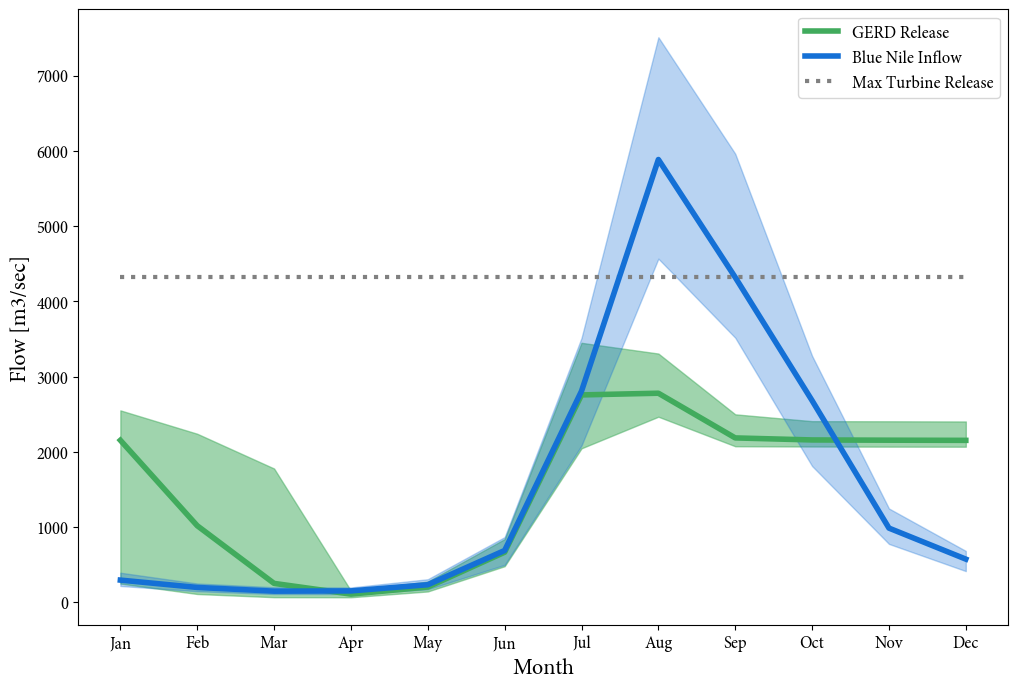

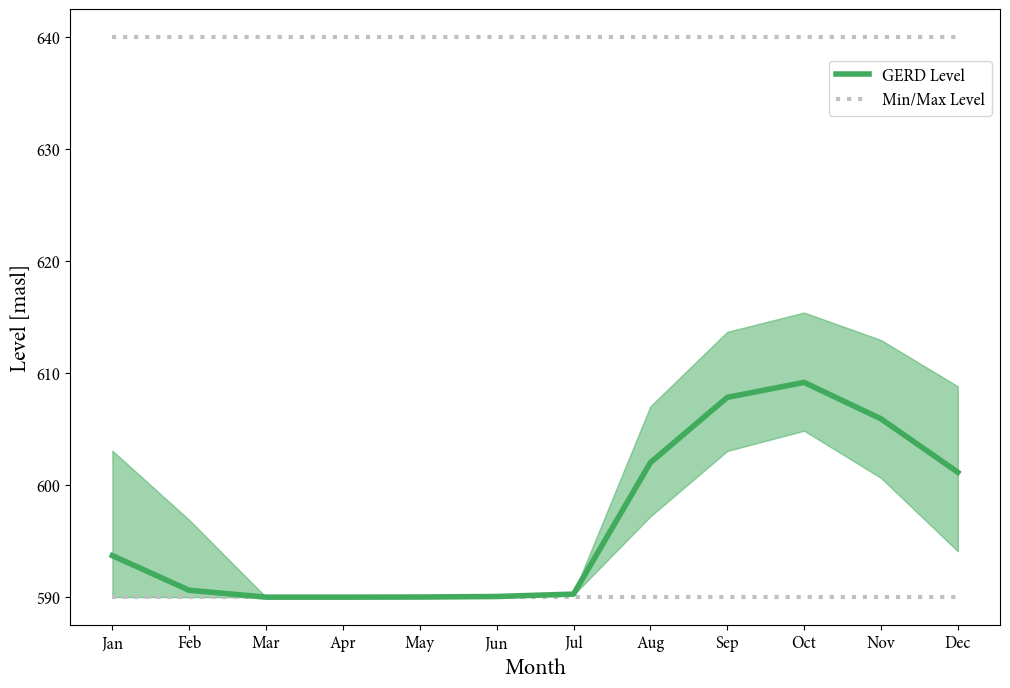

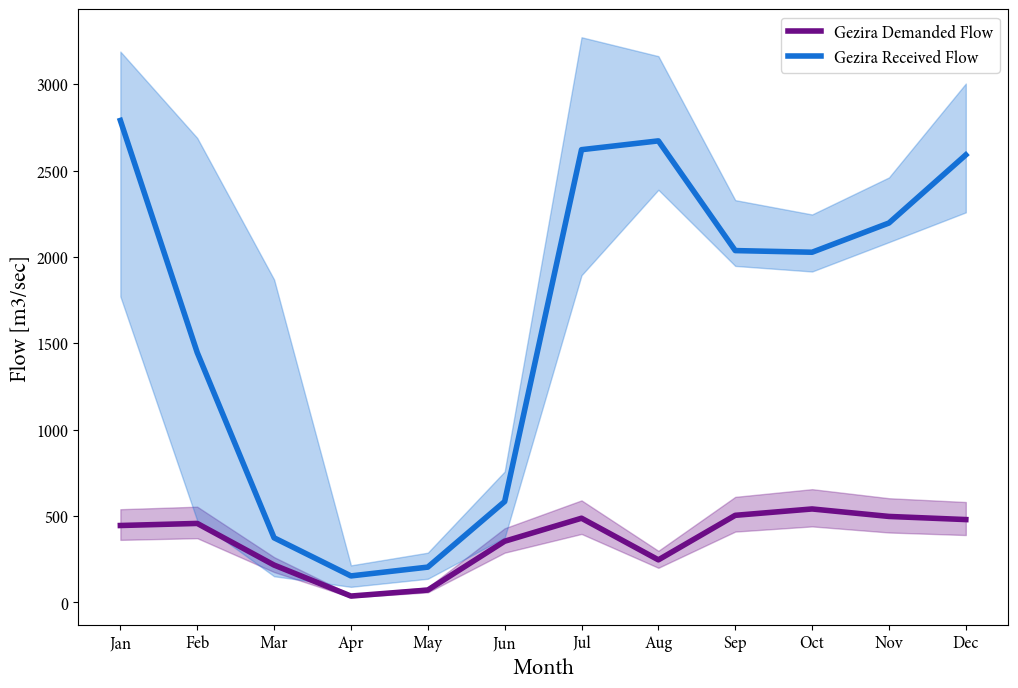

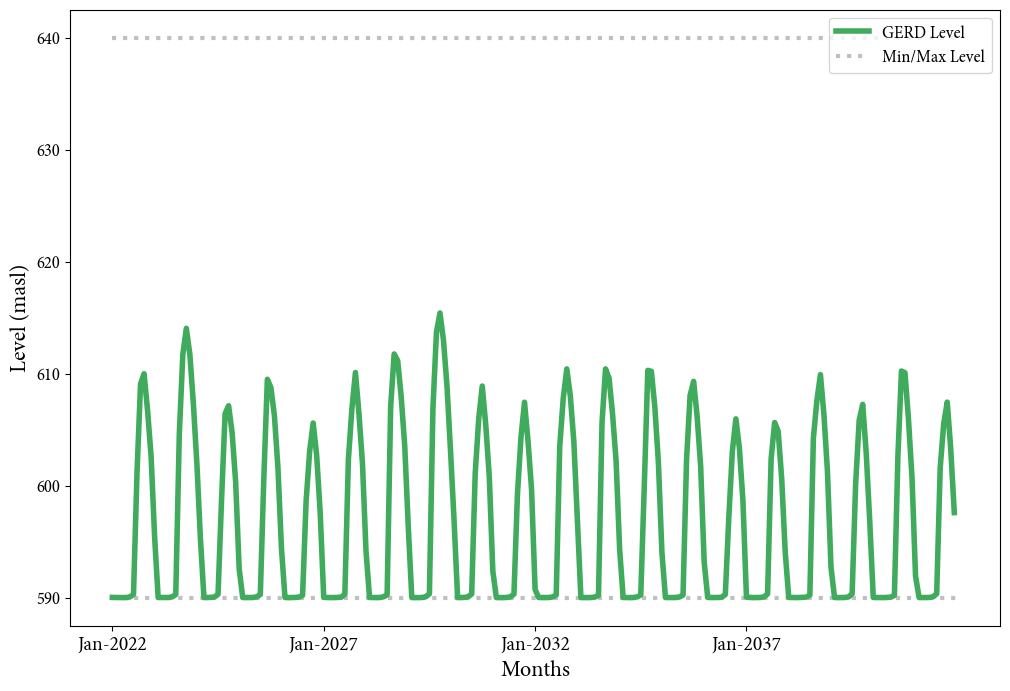

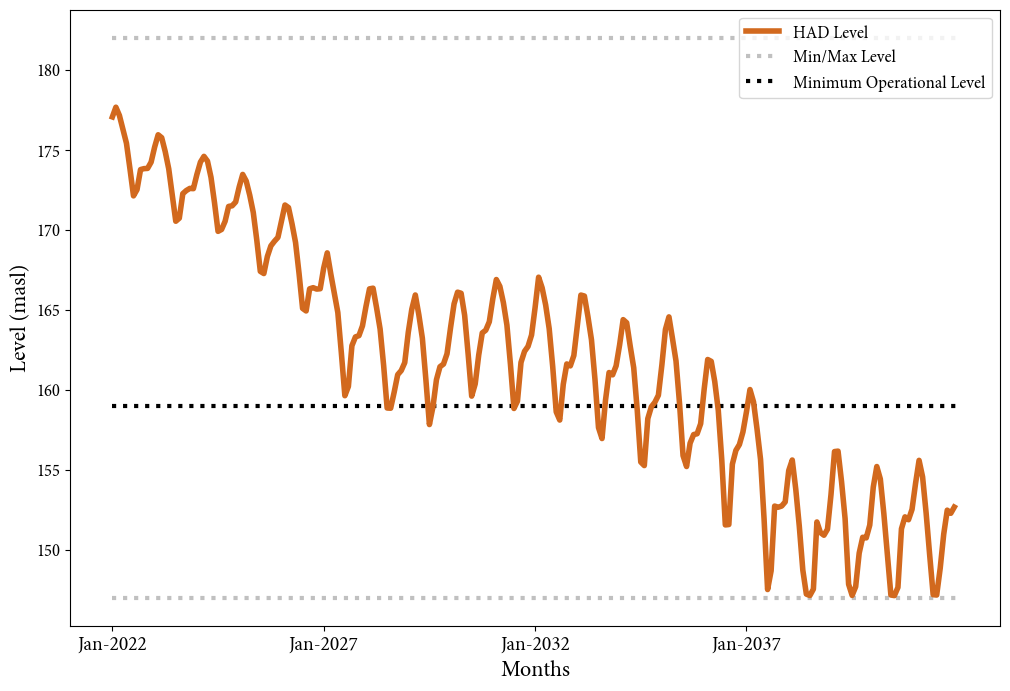

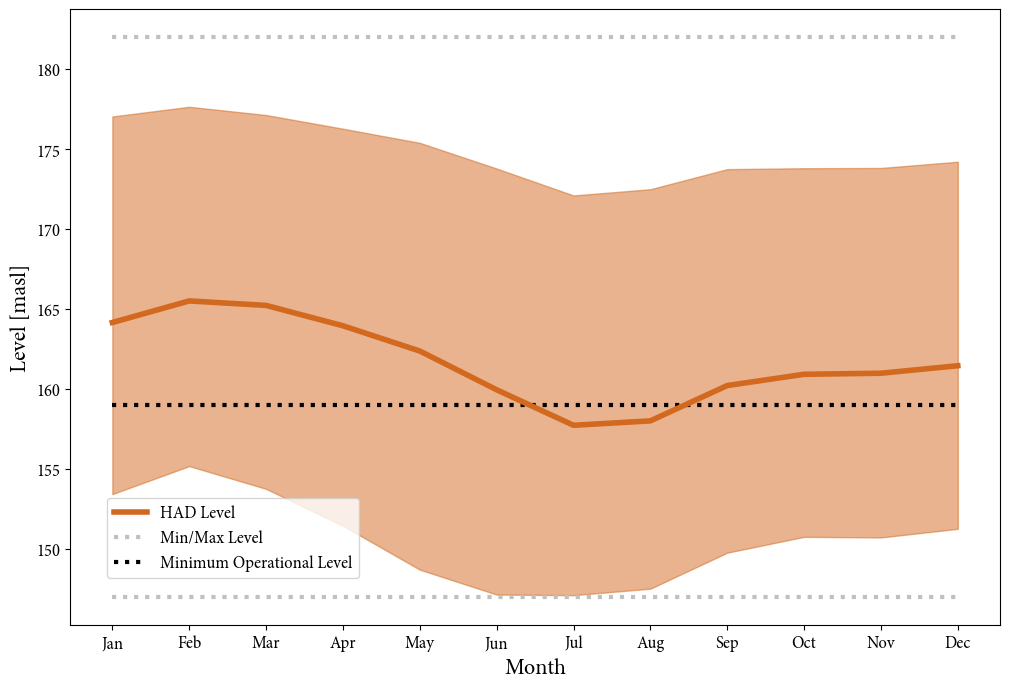

----------------
Best Egypt HAD
----------------


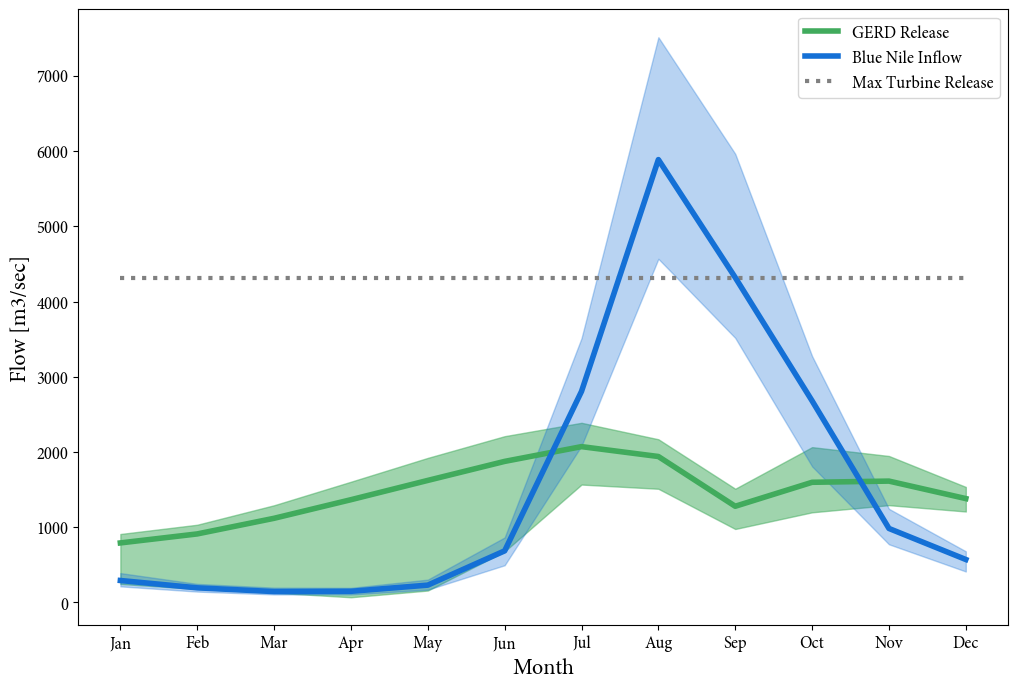

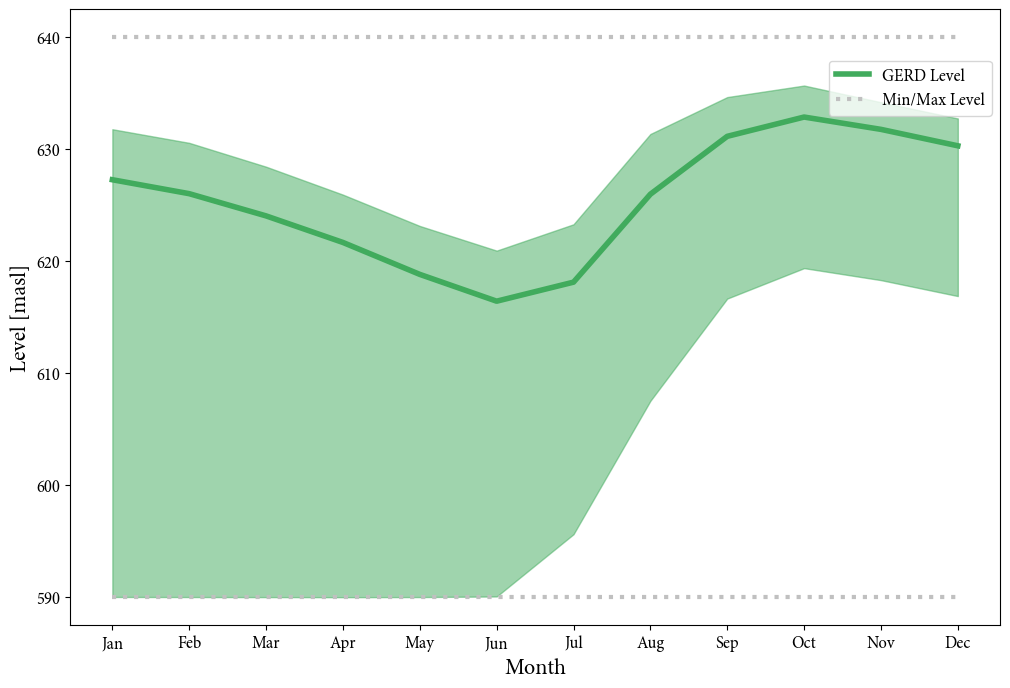

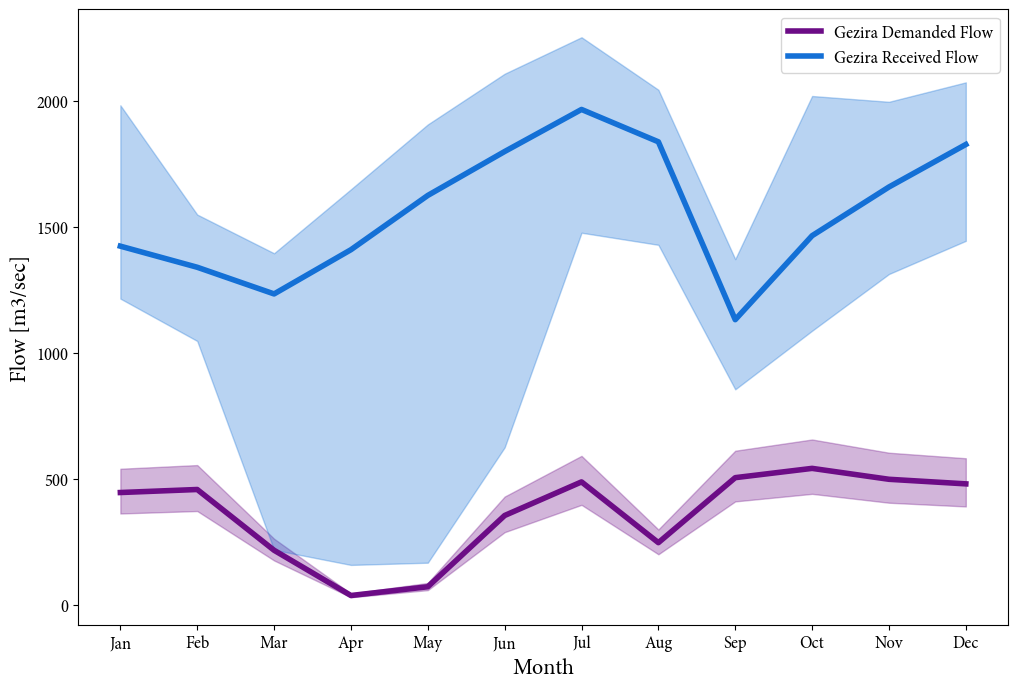

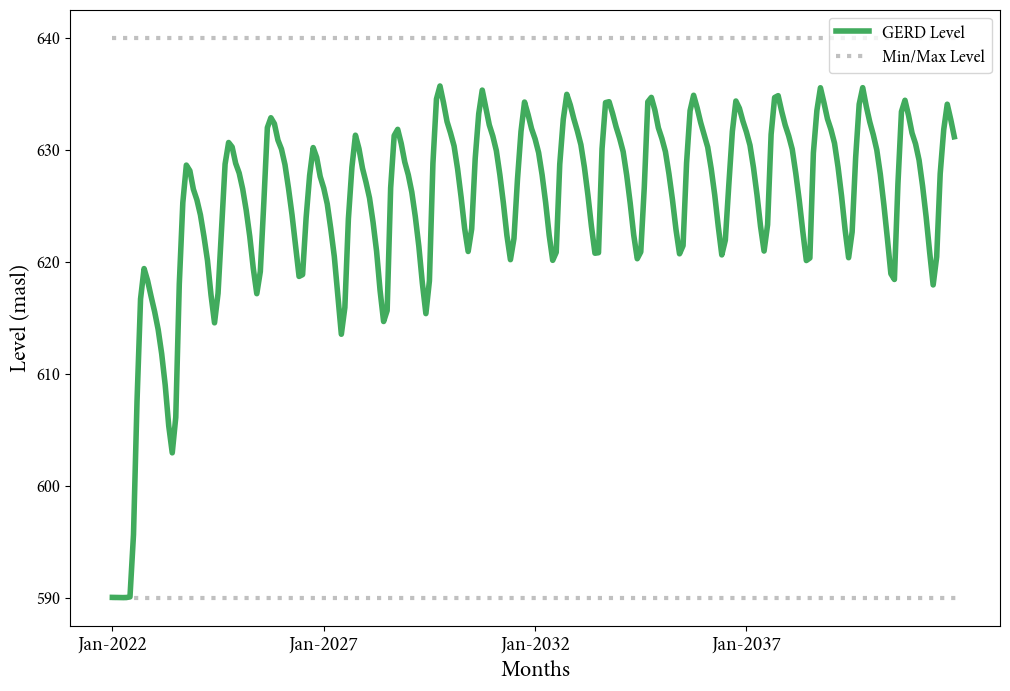

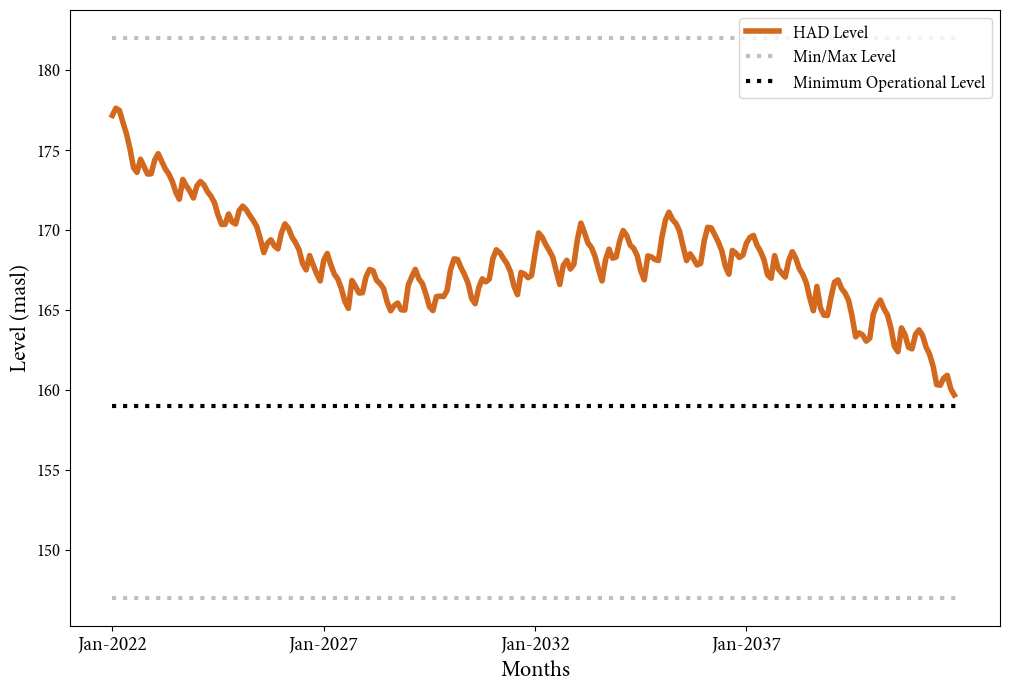

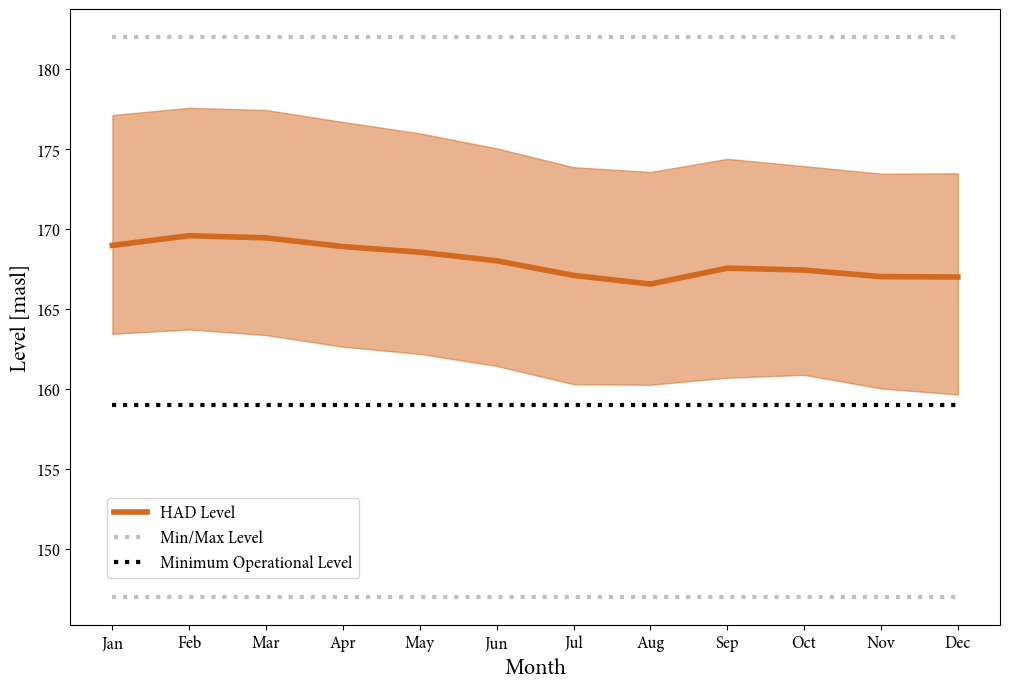

----------------
Best Ethiopia Hydropower
----------------


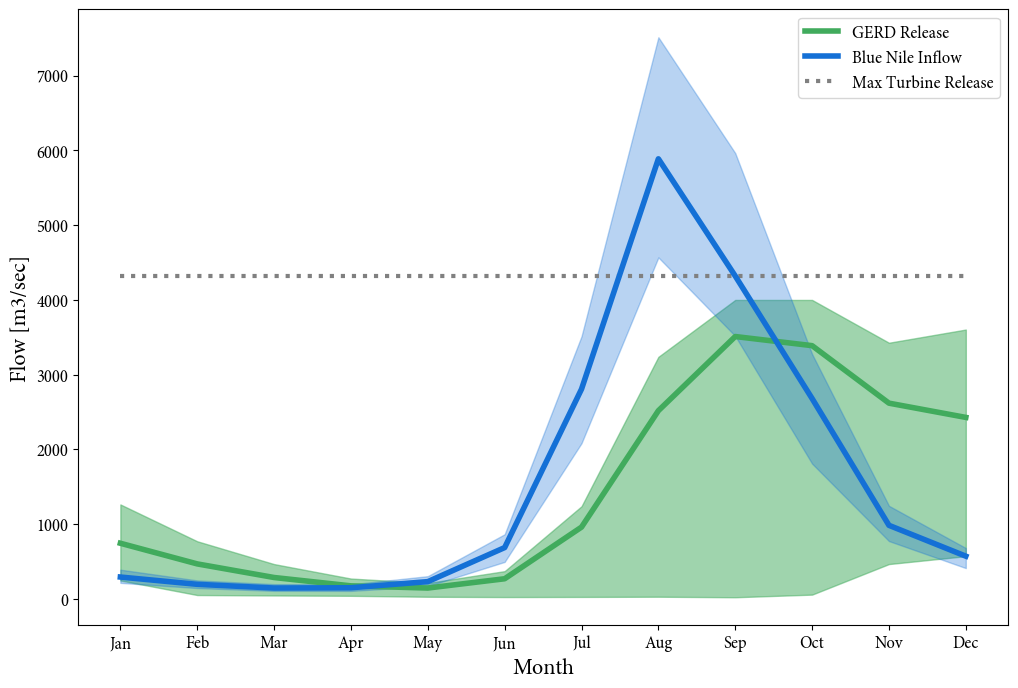

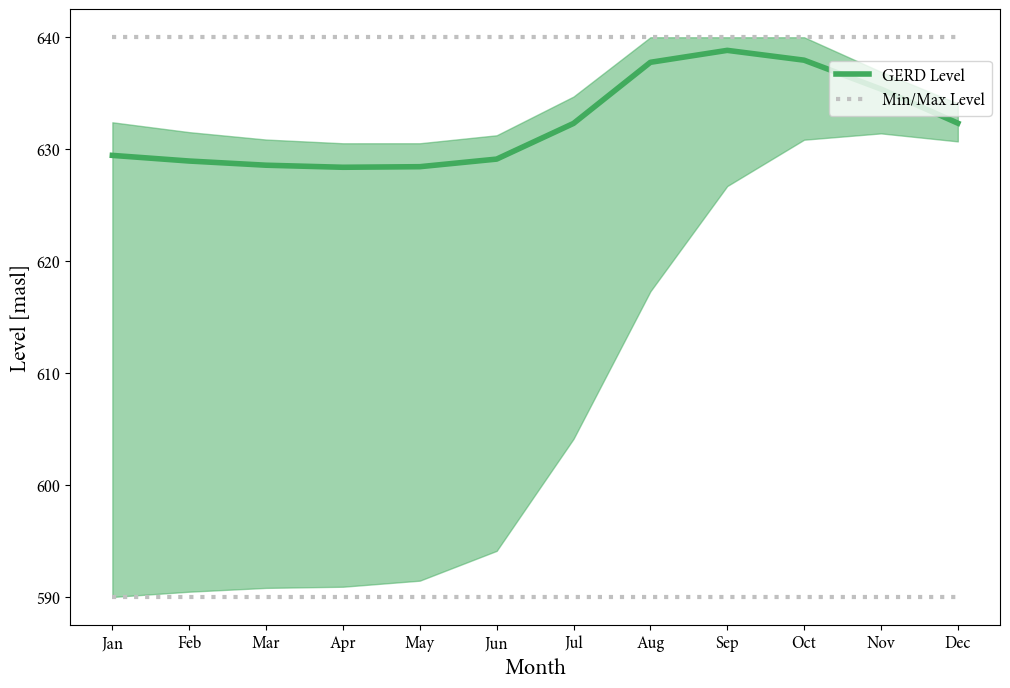

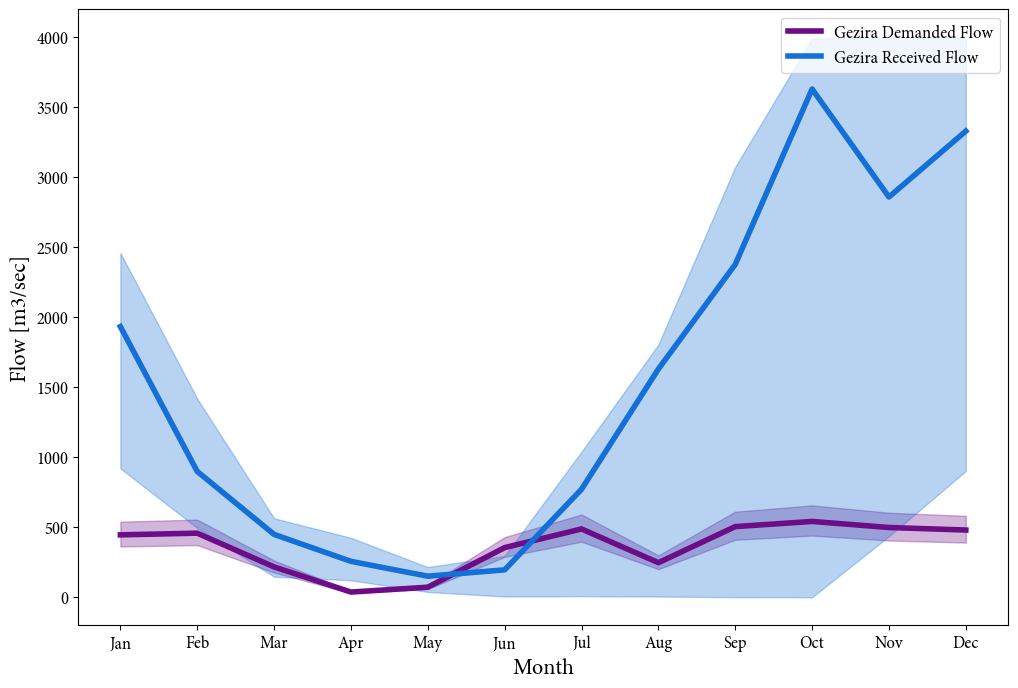

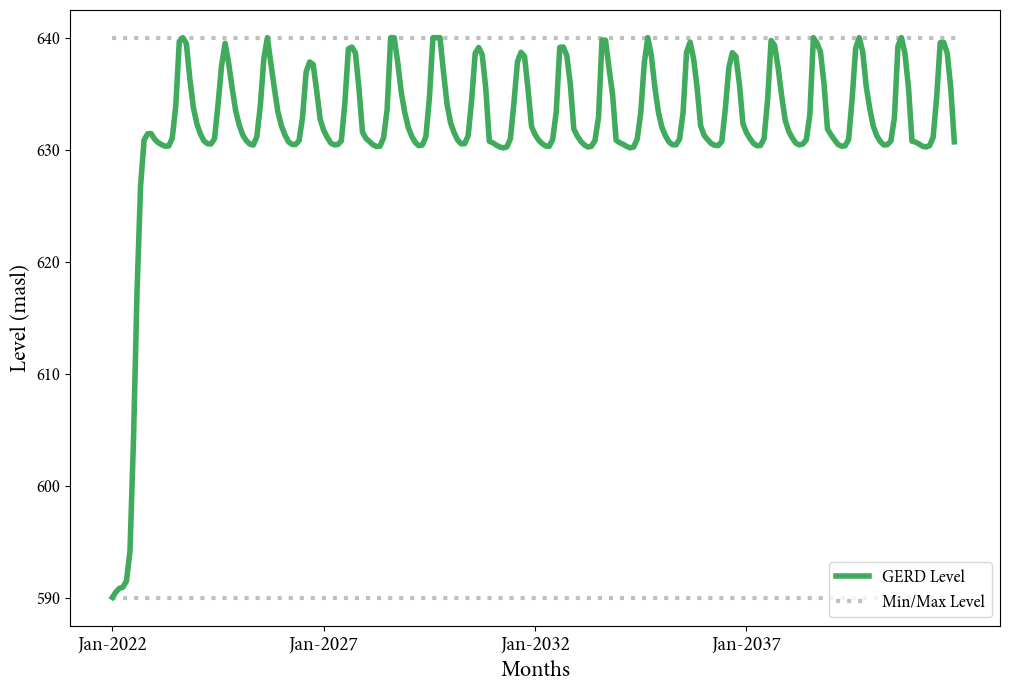

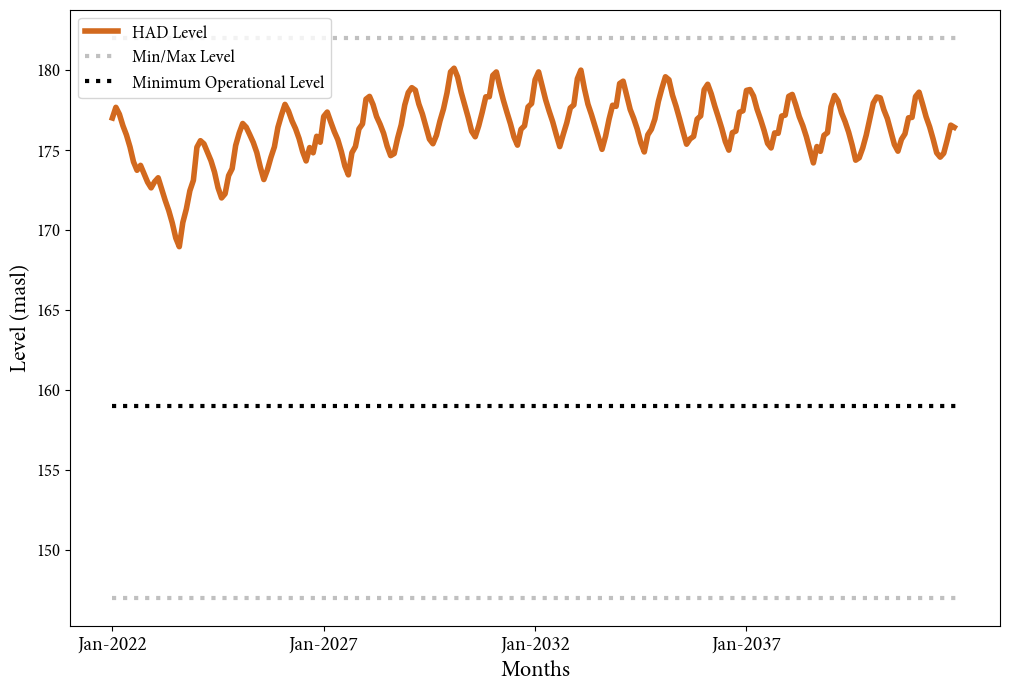

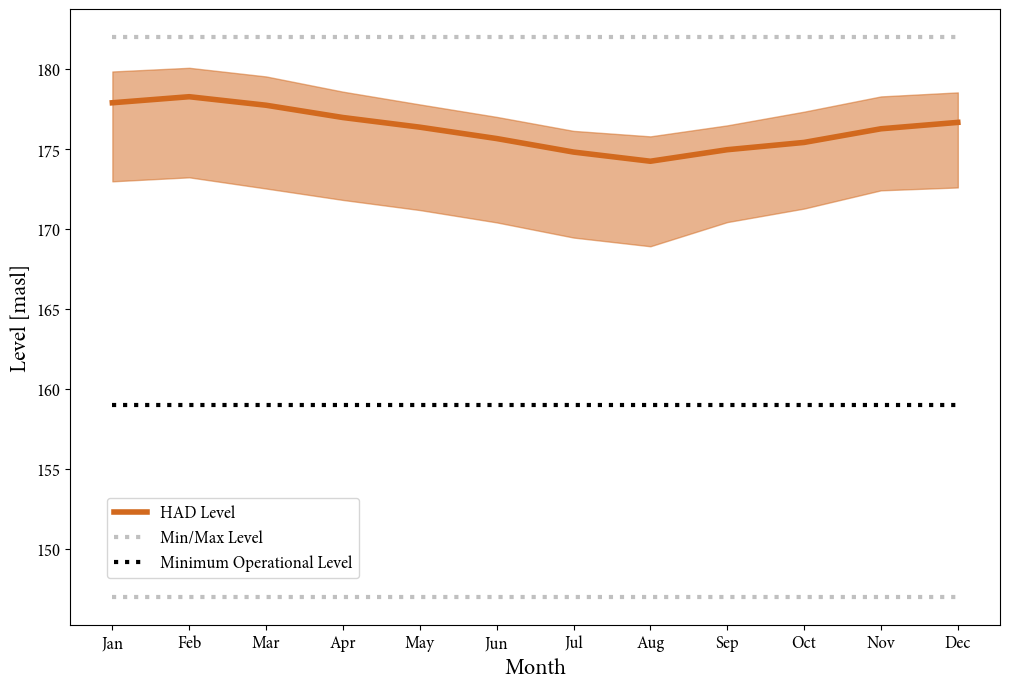

----------------
Compromise: Percentile Threshold
----------------


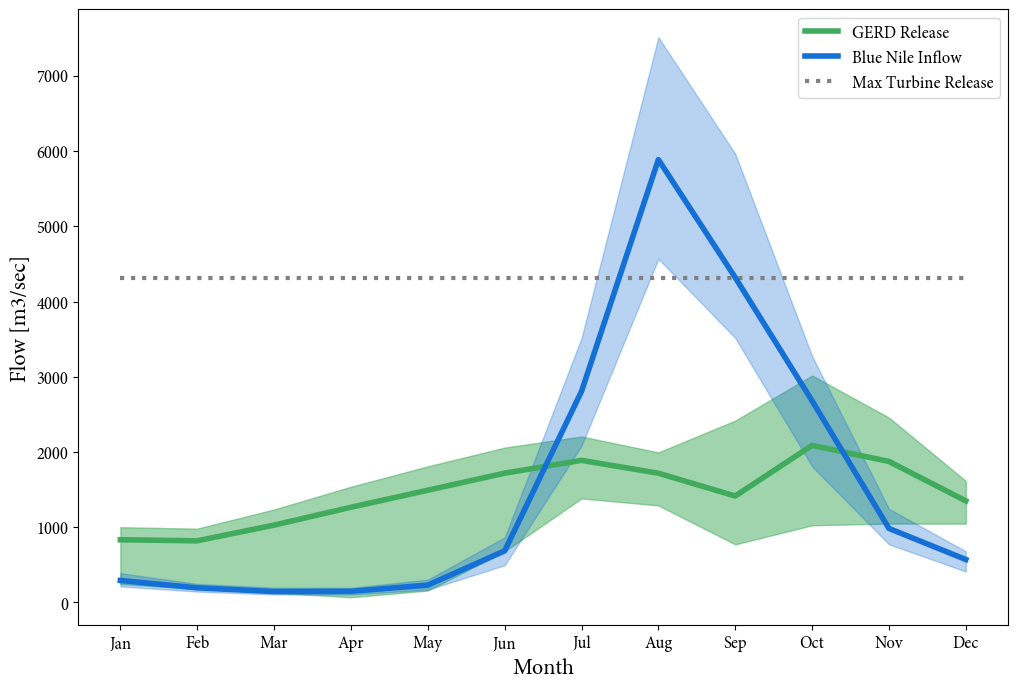

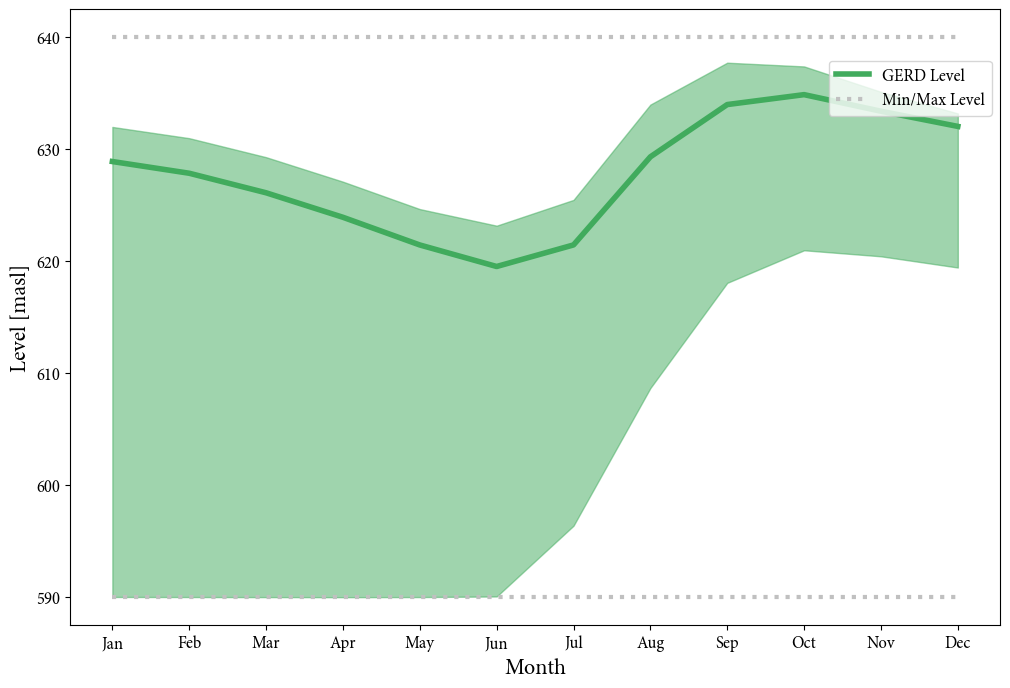

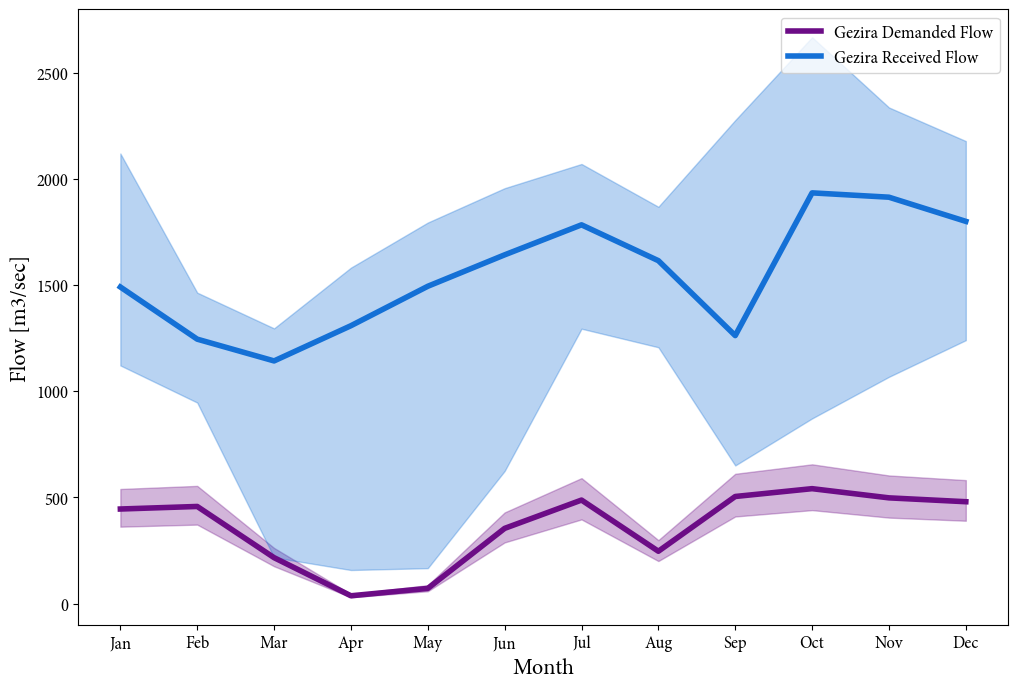

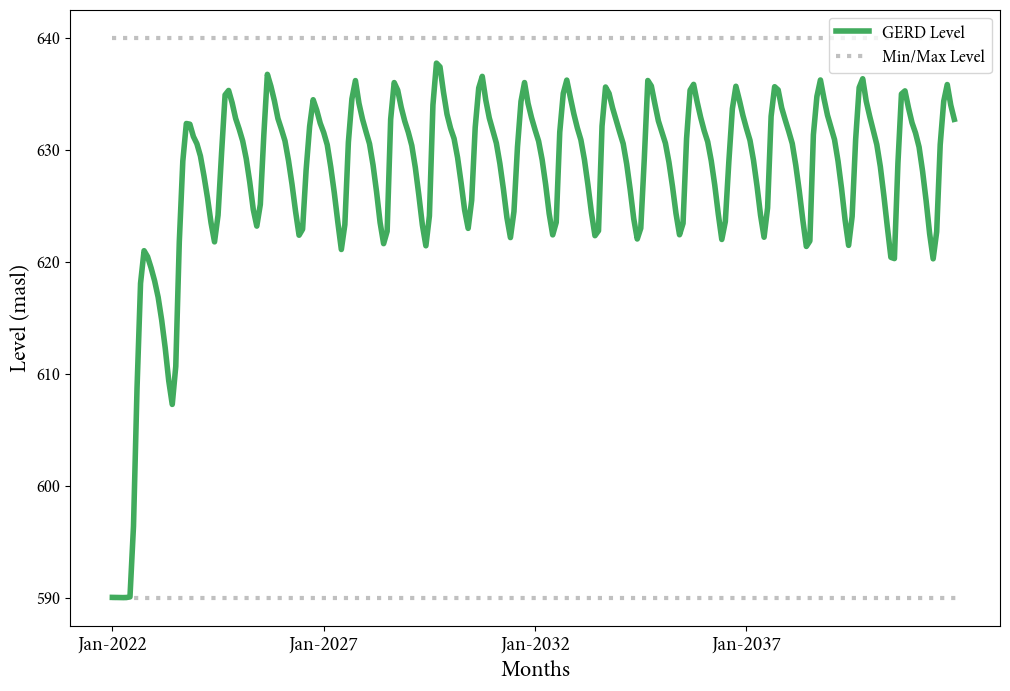

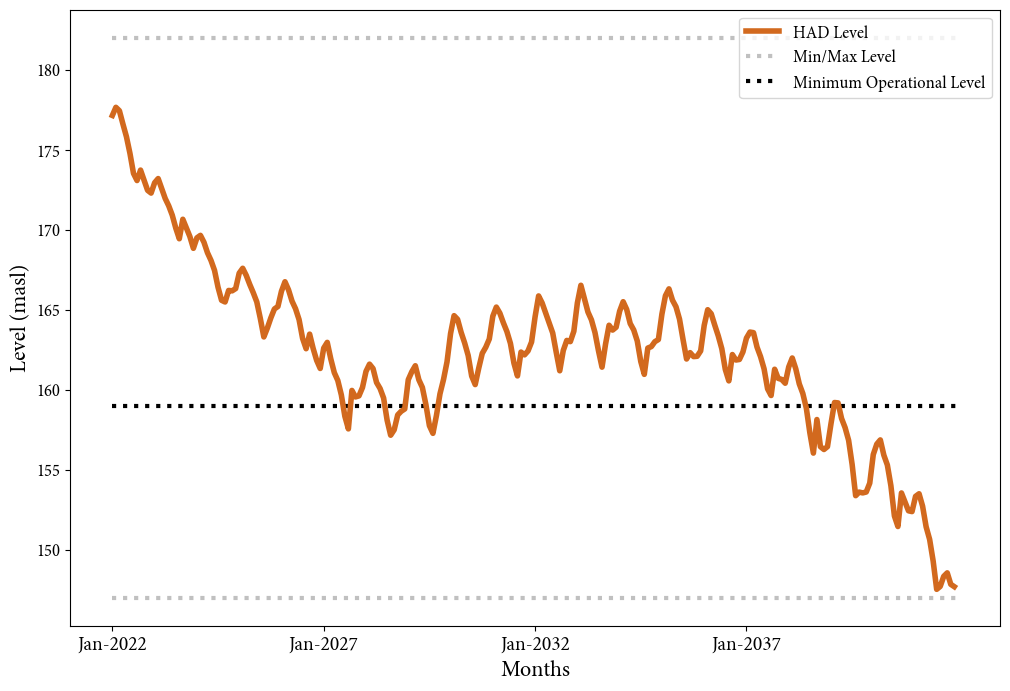

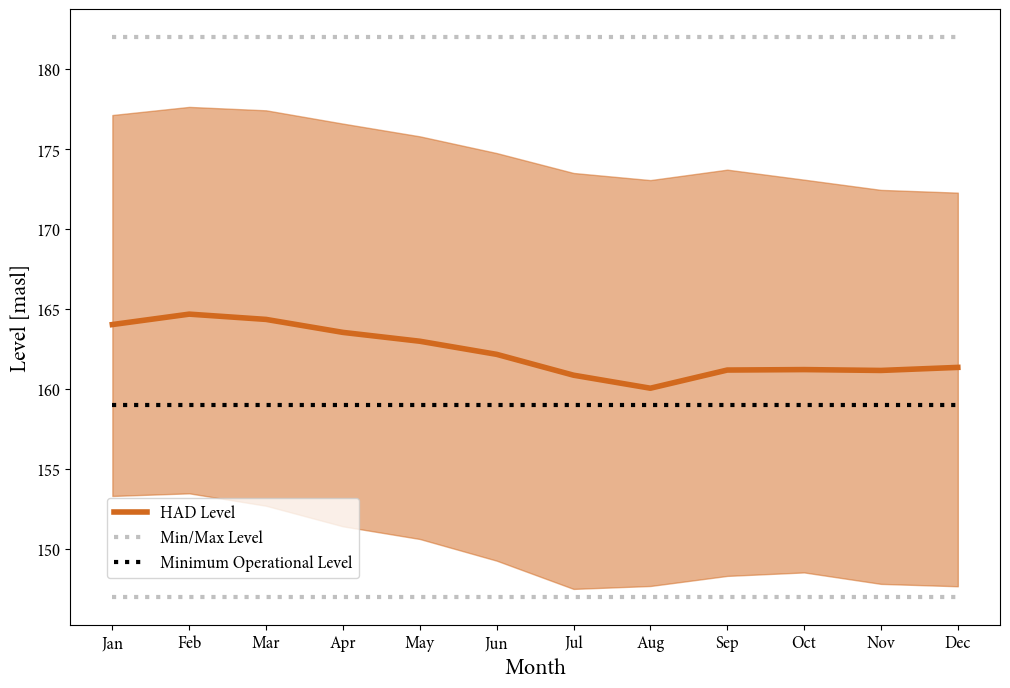

----------------
Compromise: Absolute Threshold
----------------


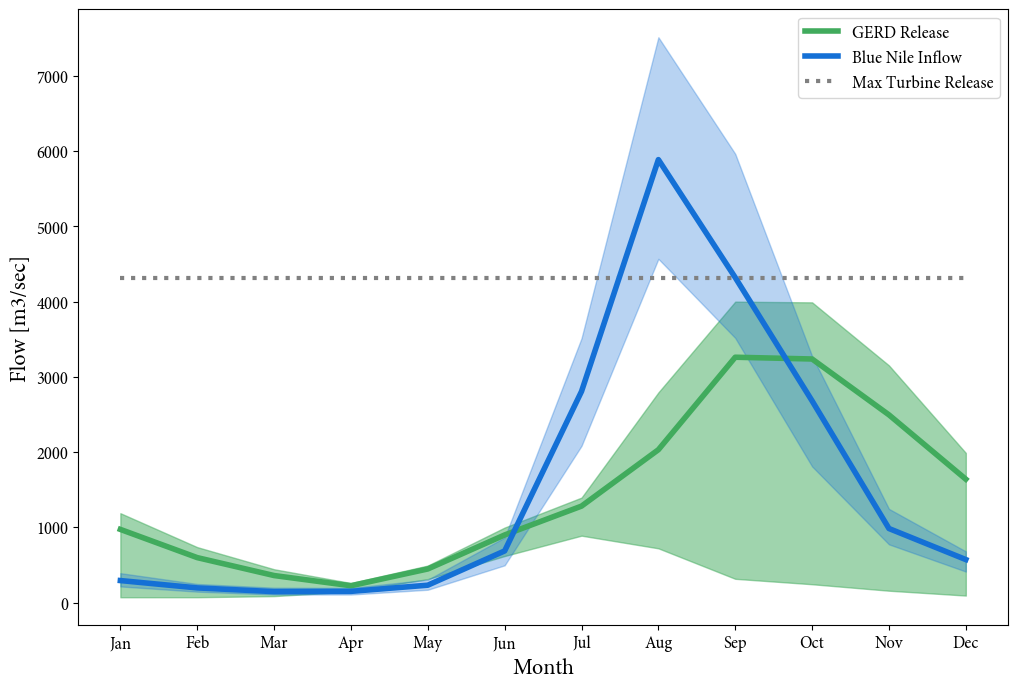

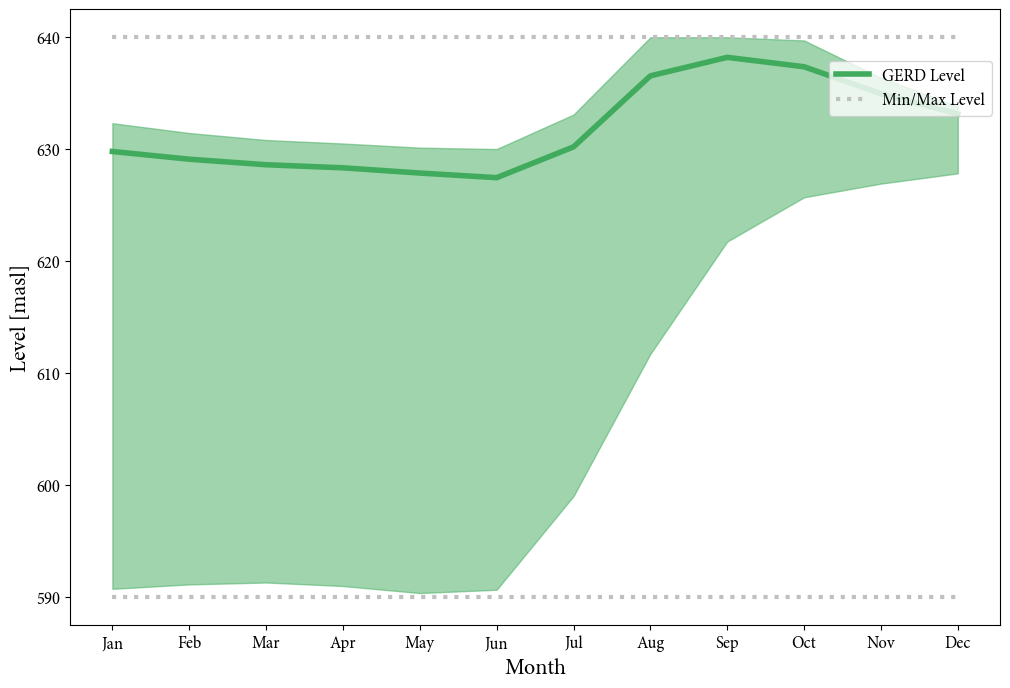

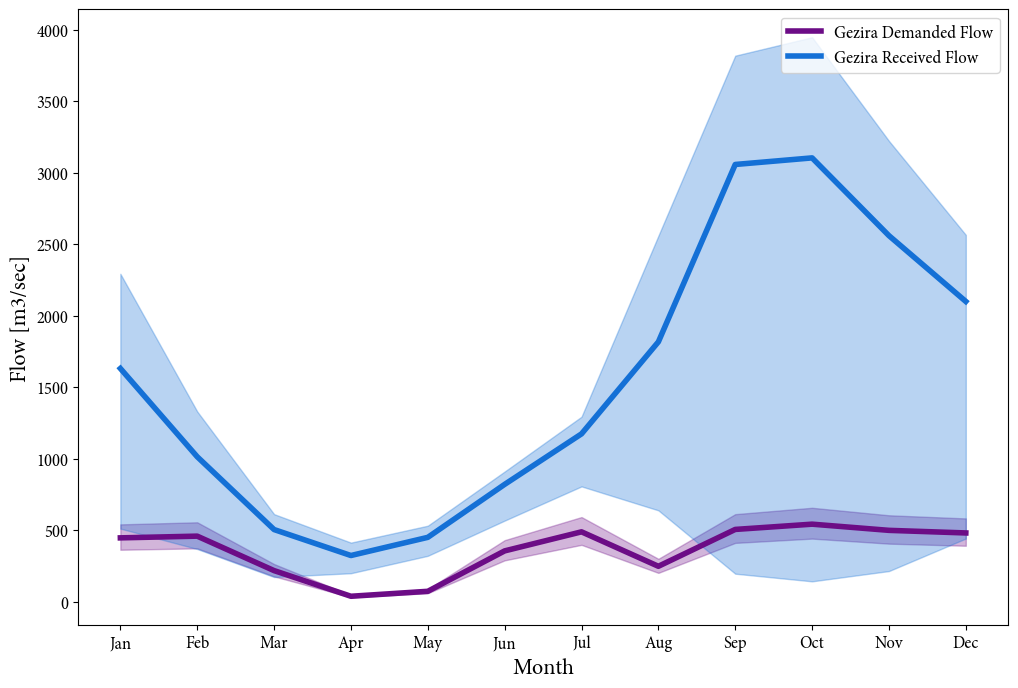

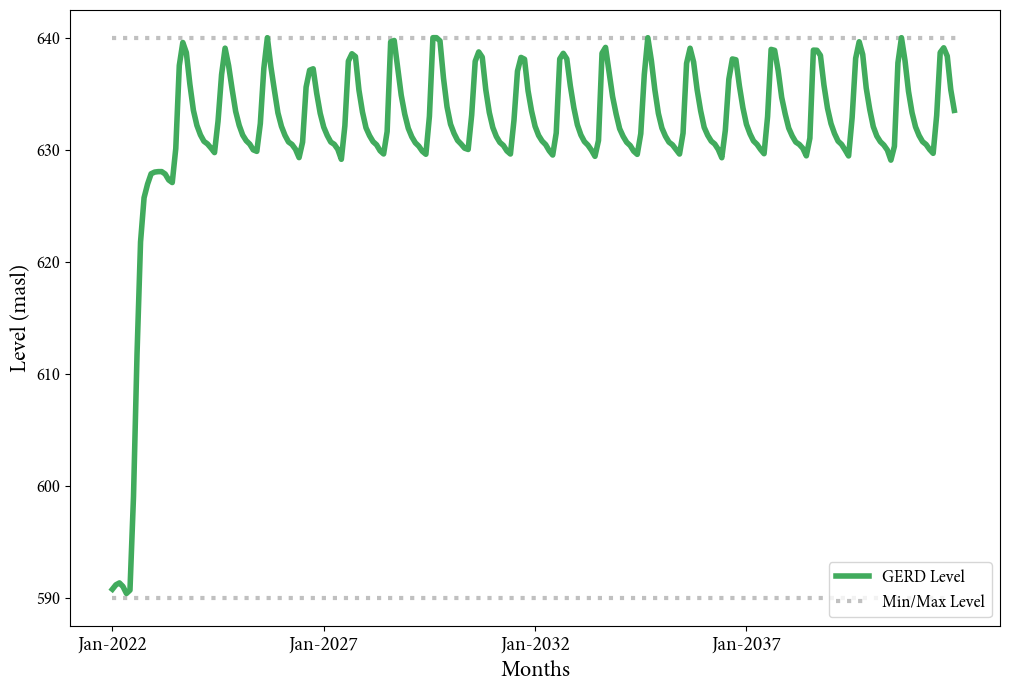

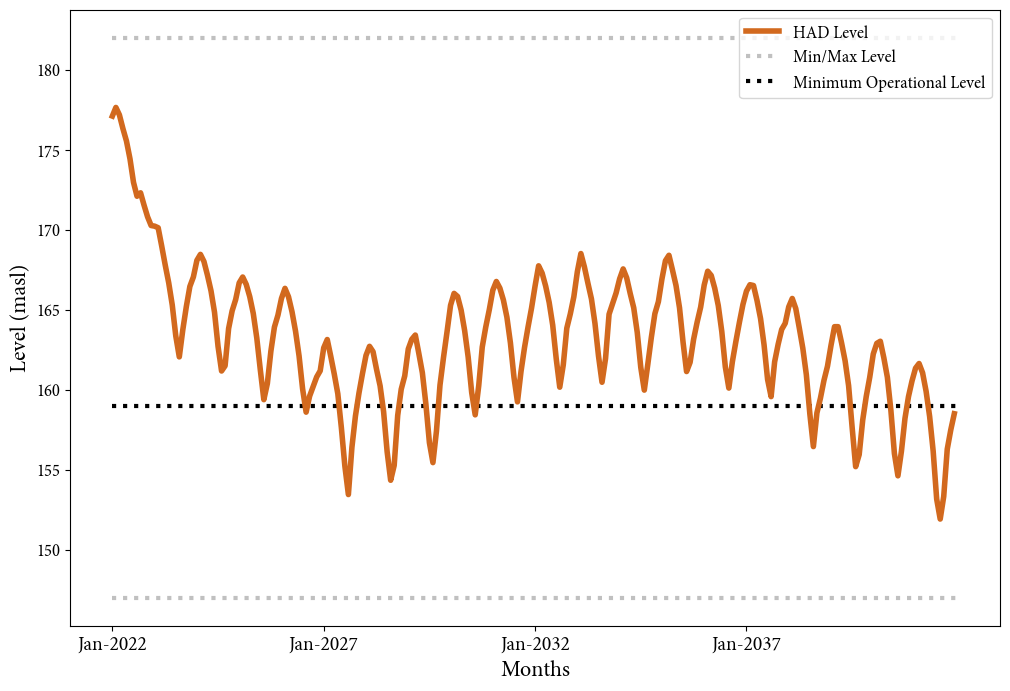

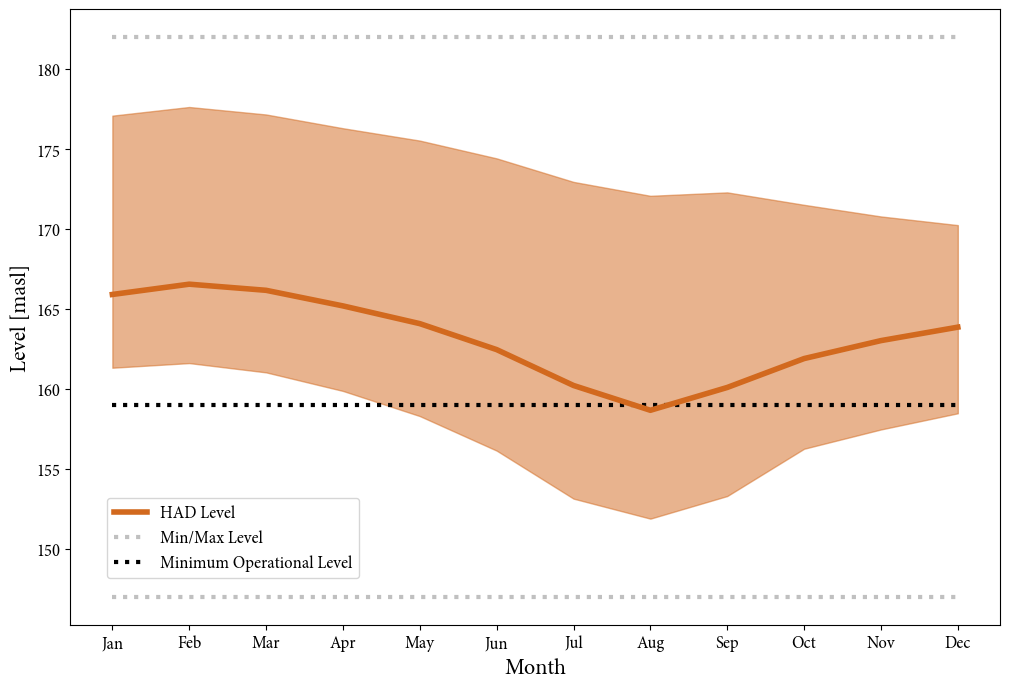

In [32]:
import importlib
importlib.reload(plotter)

for key, value in running_models.items():
    print("----------------")
    print(key)
    print("----------------")
    my_plotter = plotter.HydroModelPlotter(value)
    # plotter.plot_level_with_limits("GERD")
    my_plotter.plot_condensed_release_versus_inflow("GERD")
    my_plotter.plot_condensed_level("GERD")
    my_plotter.plot_received_vs_demand_for_district_raw_condensed("Gezira")
    my_plotter.plot_level_with_limits("GERD")
    my_plotter.plot_level_with_limits("HAD")
    my_plotter.plot_condensed_level("HAD")

In [ ]:
# release_list = []

for i, policy in enumerate(solutions):
    nile_model = ModelNile()
    nile_model = generate_input_data(nile_model, sim_horizon=20)

    print("-------------------------------------------------")
    print(solution_names[i], nile_model.evaluate(policy))

    plotter = HydroModelPlotter(nile_model)

    # ax_inflow_vs_released = plotter.plot_inflow("GERD")
    # ax_inflow_vs_released = plotter.plot_release("GERD", label=policy_names[i], ax=ax_inflow_vs_released)

    # release_list.append(nile_model.reservoirs["GERD"].release_vector)

    #     for reservoir in nile_model.reservoirs.keys():
    #         #plotter.plot_condensed_inflow_separated(reservoir, policy_names[i])
    #         #plotter.plot_condensed_release_separated(reservoir, policy_names[i])
    #         #plotter.plot_condensed_level_separated(reservoir, policy_names[i])

    #         plotter.plot_condensed_release_versus_inflow(reservoir, solution_names[i])
    #         plotter.plot_condensed_inflow(reservoir, solution_names[i])
    #         plotter.plot_condensed_release(reservoir, solution_names[i])
    #         plotter.plot_condensed_level(reservoir, solution_names[i])

    plotter.plot_level_with_limits("GERD")
    plotter.plot_level_with_limits("HAD")

#     for district in ["Egypt"]: #nile_model.irr_districts.keys():
#         plotter.plot_received_vs_demand_for_district(district)
#         plotter.plot_received_vs_demand_for_district_raw(district)

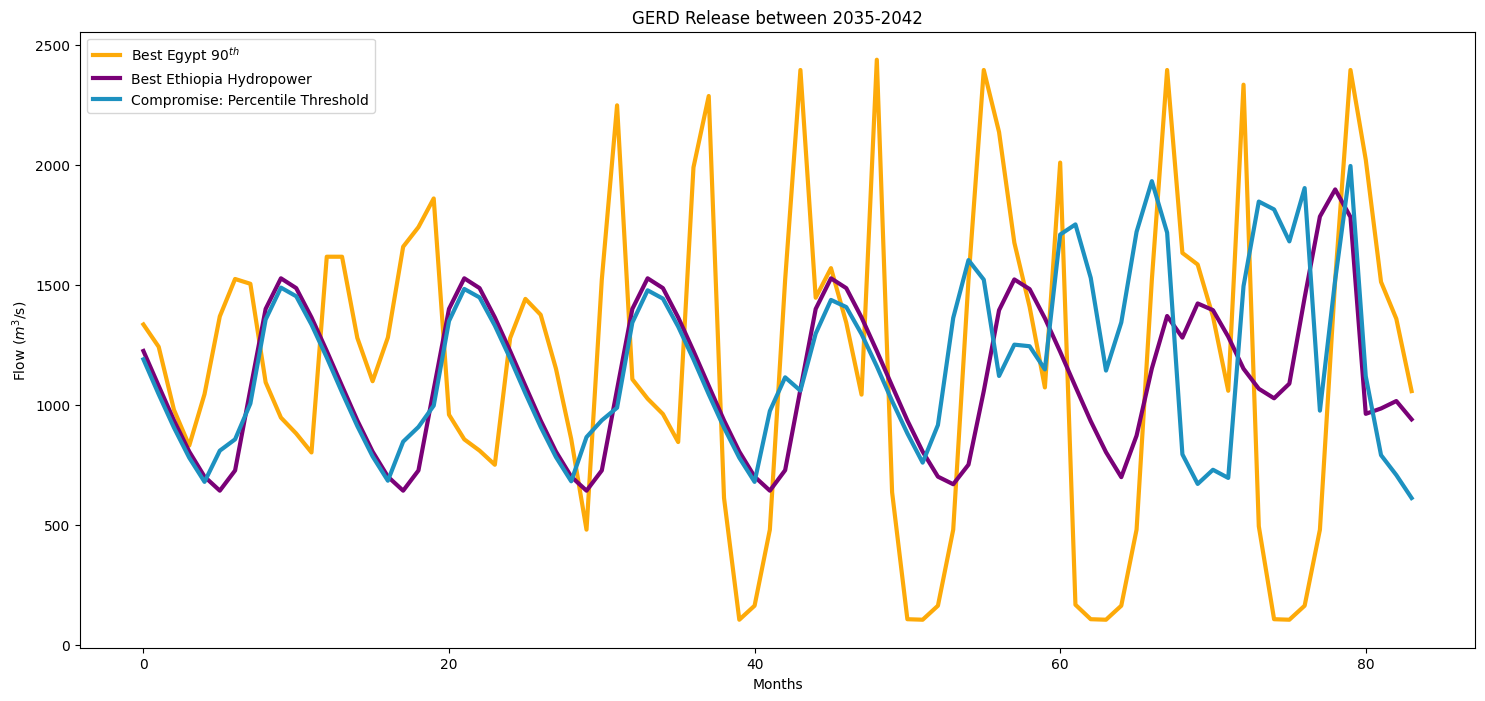

In [41]:
gray = "#bdbdbd"
purple = "#7a0177"
green = "#41ab5d"
blue = "#1d91c0"
yellow = "#fdaa09"
pink = "#c51b7d"

release_60 = [release_list[i][-84:] for i in range(len(release_list)) if i in [1, 3, 4]]

plotter.plot_multiple_lines_together(
    release_60,
    [
        "Best Egypt $90^{th}$",
        "Best Ethiopia Hydropower",
        "Compromise: Percentile Threshold",
    ],
    title="GERD Release between 2035-2042",
    x_title="Months",
    y_title="Flow ($m^{3}$/s)",
    colors=[yellow, purple, blue],
)

In [17]:
# test_policies = [best_egypt_irr_and_HAD, best_egypt_90, best_ethiopia_hydro]
# nile_model = generate_input_data(nile_model, sim_horizon=20)
# model_plotter = HydroModelPlotter(nile_model)

# for pol in test_policies:
#     nile_model.evaluate(pol)
#     model_plotter.plot_received_vs_demand_for_district("Egypt")
#     model_plotter.plot_received_vs_demand_for_district("Gezira")

#     for dam in nile_model.reservoir_names:
#         model_plotter.plot_level_with_limits(dam)
#         model_plotter.plot_levels_condensed(dam)

In [82]:
def parallel_plots(objectives_df, solution_indices=[], solution_names=[]):
    file_name = "Best_objectives"

    names = list(objectives_df.columns)

    names_display = [
        "Egypt_irr",
        "Egypt90_irr",
        "Egypt_low_HAD",
        "Sudan_irr",
        "Ethiopia_hydro",
    ]
    units = ["BCM/year", "m3/s", "%", "BCM/year", "TWh/year"]
    directions = ["min", "min", "min", "min", "max"]

    norm_df, desirability_couples = normalize_objs(objectives_df, directions)

    uds = []  # undesired
    ds = []  # desired
    for i in desirability_couples:
        uds.append(str(round(i[0], 1)))
        ds.append(str(round(i[1], 1)))

    norm_df["Name"] = "All Solutions"
    for i, solution_index in enumerate(solution_indices):
        norm_df.loc[solution_index, "Name"] = solution_names[i]
        norm_df = norm_df.append(norm_df.loc[solution_index, :].copy())

    fig = plt.figure()

    ax1 = fig.add_subplot(111)

    gray = "#bdbdbd"
    purple = "#7a0177"
    green = "#41ab5d"
    blue = "#1d91c0"
    yellow = "#fdaa09"
    pink = "#c51b7d"

    parallel_coordinates(
        norm_df,
        "Name",
        color=[gray, purple, yellow, blue, pink, green, "red"],
        linewidth=7,
        alpha=0.8,
    )
    plt.legend(
        bbox_to_anchor=(0.0, 1.02, 1.0, 0.102),
        loc=3,
        ncol=4,
        mode="expand",
        borderaxespad=1.5,
        fontsize=18,
    )

    ax1.set_xticks(np.arange(len(names)))

    ax1.set_xticklabels(
        [uds[i] + "\n" + "\n" + names[i] + "\n" + units[i] for i in range(len(names))],
        fontsize=18,
    )
    ax2 = ax1.twiny()
    ax2.set_xticks(np.arange(len(names)))
    ax2.set_xticklabels([ds[i] for i in range(len(names))], fontsize=18)

    ax1.get_yaxis().set_visible([])
    plt.text(
        1.02,
        0.5,
        "Direction of Preference $\\rightarrow$",
        {"color": "#636363", "fontsize": 20},
        horizontalalignment="left",
        verticalalignment="center",
        rotation=90,
        clip_on=False,
        transform=plt.gca().transAxes,
    )

    fig.set_size_inches(17.5, 9)
    plt.show()

In [83]:
objectives

egypt_irr    egypt_90  egypt_low_had    sudan_irr  ethiopia_hydro
0    30756.347466  405.222143       0.008333     0.000000    3.251154e+07
1    21022.203556  277.429739       0.016667  1470.246617    5.995508e+06
2    25122.257813  286.975361       0.104167     0.000000    3.220148e+07
3    23272.987115  236.067736       0.150000    68.840364    3.138020e+07
4    26440.156002  310.429921       0.079167     0.000000    3.251154e+07
..            ...         ...            ...          ...             ...
845  18506.815675  144.778832       0.129167    77.186038    2.346972e+07
846  18382.679249  218.740521       0.100000   127.865400    2.718407e+07
847  26817.784397  358.505919       0.016667     0.000000    3.130520e+07
848  21964.758312  317.305943       0.016667   314.168930    2.912748e+07
849  25535.620638  344.421780       0.000000    29.952895    3.002876e+07

[850 rows x 5 columns]